# Dataset Summary and Visualization

This notebook generates three key visualizations to summarize the cleaned automotive dataset:
1. **Dataset Overview**: Total records, variables, and feature/target distinction
2. **Variable Type Distribution**: Frequency of numeric, binary, ordinal, and nominal types
3. **Statistical Summary**: Descriptive statistics with boxplots for numerical variables


In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for professional-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12, 8)

# Create directory for output images
output_dir = Path('../Data')
output_dir.mkdir(exist_ok=True)

print("Libraries imported successfully!")


Libraries imported successfully!


In [13]:
# Load the dataset
data_path = '../Data/autos_random_50k_cleaned.csv'
df = pd.read_csv(data_path, index_col=0)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Dataset loaded successfully!
Shape: (37866, 17)

First few rows:


,date_crawled,car_name,price_EUR,ab_test,vehicle_type,registration_year,transmission,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
1,2016-04-02 14:51,Astra_G_Cabrio_Turbo_235_PS,5200,test,cabrio,2002,manuell,235,astra,125000,5,Unknown,opel,nein,2016-04-02 0:00,47652,2016-04-06 13:17
2,2016-03-19 18:36,Fiat_Grande_Punto_1.2_8V__MIT_2_JAHREN_GARANTIE,3400,test,kleinwagen,2006,manuell,65,andere,125000,5,benzin,fiat,nein,2016-03-19 0:00,66538,2016-04-07 7:15
3,2016-03-09 20:59,Volvo_XC60_D5_AWD_Aut.,5200,test,suv,2009,automatik,220,xc_reihe,150000,3,diesel,volvo,ja,2016-03-09 0:00,72762,2016-03-16 5:46
4,2016-03-26 15:55,Kombi_Technisch_super_in_Schuss,750,test,kombi,2000,manuell,112,mondeo,150000,12,benzin,ford,Unknown,2016-03-26 0:00,39446,2016-03-26 15:55
5,2016-03-29 14:47,Audi_A4_1.9_TDI_quattro_Delphingrau,3522,test,limousine,2004,manuell,131,a4,150000,7,diesel,audi,nein,2016-03-29 0:00,51373,2016-03-29 14:47


In [14]:
# Analyze dataset structure and automatically infer variable types
def classify_variable_types(df):
    """
    Automatically classify variables into: numeric, binary, ordinal, nominal
    """
    variable_info = {}
    
    for col in df.columns:
        unique_vals = df[col].nunique()
        dtype = df[col].dtype
        
        # Determine variable type
        if dtype in ['int64', 'float64']:
            if unique_vals == 2:
                var_type = 'binary'
            elif col in ['registration_year', 'registration_month']:
                var_type = 'ordinal'
            else:
                var_type = 'numeric'
        else:
            if unique_vals == 2:
                var_type = 'binary'
            elif unique_vals <= 10:
                var_type = 'ordinal'
            else:
                var_type = 'nominal'
        
        variable_info[col] = {
            'type': var_type,
            'dtype': str(dtype),
            'unique_values': unique_vals,
            'missing': df[col].isna().sum()
        }
    
    return variable_info

# Get variable information
var_info = classify_variable_types(df)

# Create a summary DataFrame
var_summary = pd.DataFrame(var_info).T
var_summary = var_summary.reset_index()
var_summary.columns = ['Variable', 'Type', 'Dtype', 'Unique_Values', 'Missing']

print("Variable Type Classification:")
print(var_summary)


Variable Type Classification:
              Variable     Type   Dtype Unique_Values Missing
0         date_crawled  nominal  object         11420       0
1             car_name  nominal  object         28377       0
2            price_EUR  numeric   int64          2121       0
3              ab_test   binary  object             2       0
4         vehicle_type  ordinal  object             9       0
5    registration_year  ordinal   int64            74       0
6         transmission  ordinal  object             3       0
7             power_ps  numeric   int64           395       0
8                model  nominal  object           244       0
9          odometer_km  numeric   int64            13       0
10  registration_month  ordinal   int64            12       0
11           fuel_type  ordinal  object             8       0
12               brand  nominal  object            40       0
13   unrepaired_damage  ordinal  object             3       0
14          ad_created  nominal  object 

In [15]:
# Identify features vs target variable
# Assuming 'price_EUR' is the target variable (common in automotive datasets)
target_variable = 'price_EUR'
feature_variables = [col for col in df.columns if col != target_variable]

print(f"\nTarget Variable: {target_variable}")
print(f"Number of Feature Variables: {len(feature_variables)}")
print(f"Feature Variables: {feature_variables}")



Target Variable: price_EUR
Number of Feature Variables: 16
Feature Variables: ['date_crawled', 'car_name', 'ab_test', 'vehicle_type', 'registration_year', 'transmission', 'power_ps', 'model', 'odometer_km', 'registration_month', 'fuel_type', 'brand', 'unrepaired_damage', 'ad_created', 'postal_code', 'last_seen']


## Visualization 1: Dataset Overview

This visualization displays:
- Total number of records (rows)
- Total number of variables (columns)
- Distinction between features and target variable


✓ Visualization 1 saved as 'overview.png'


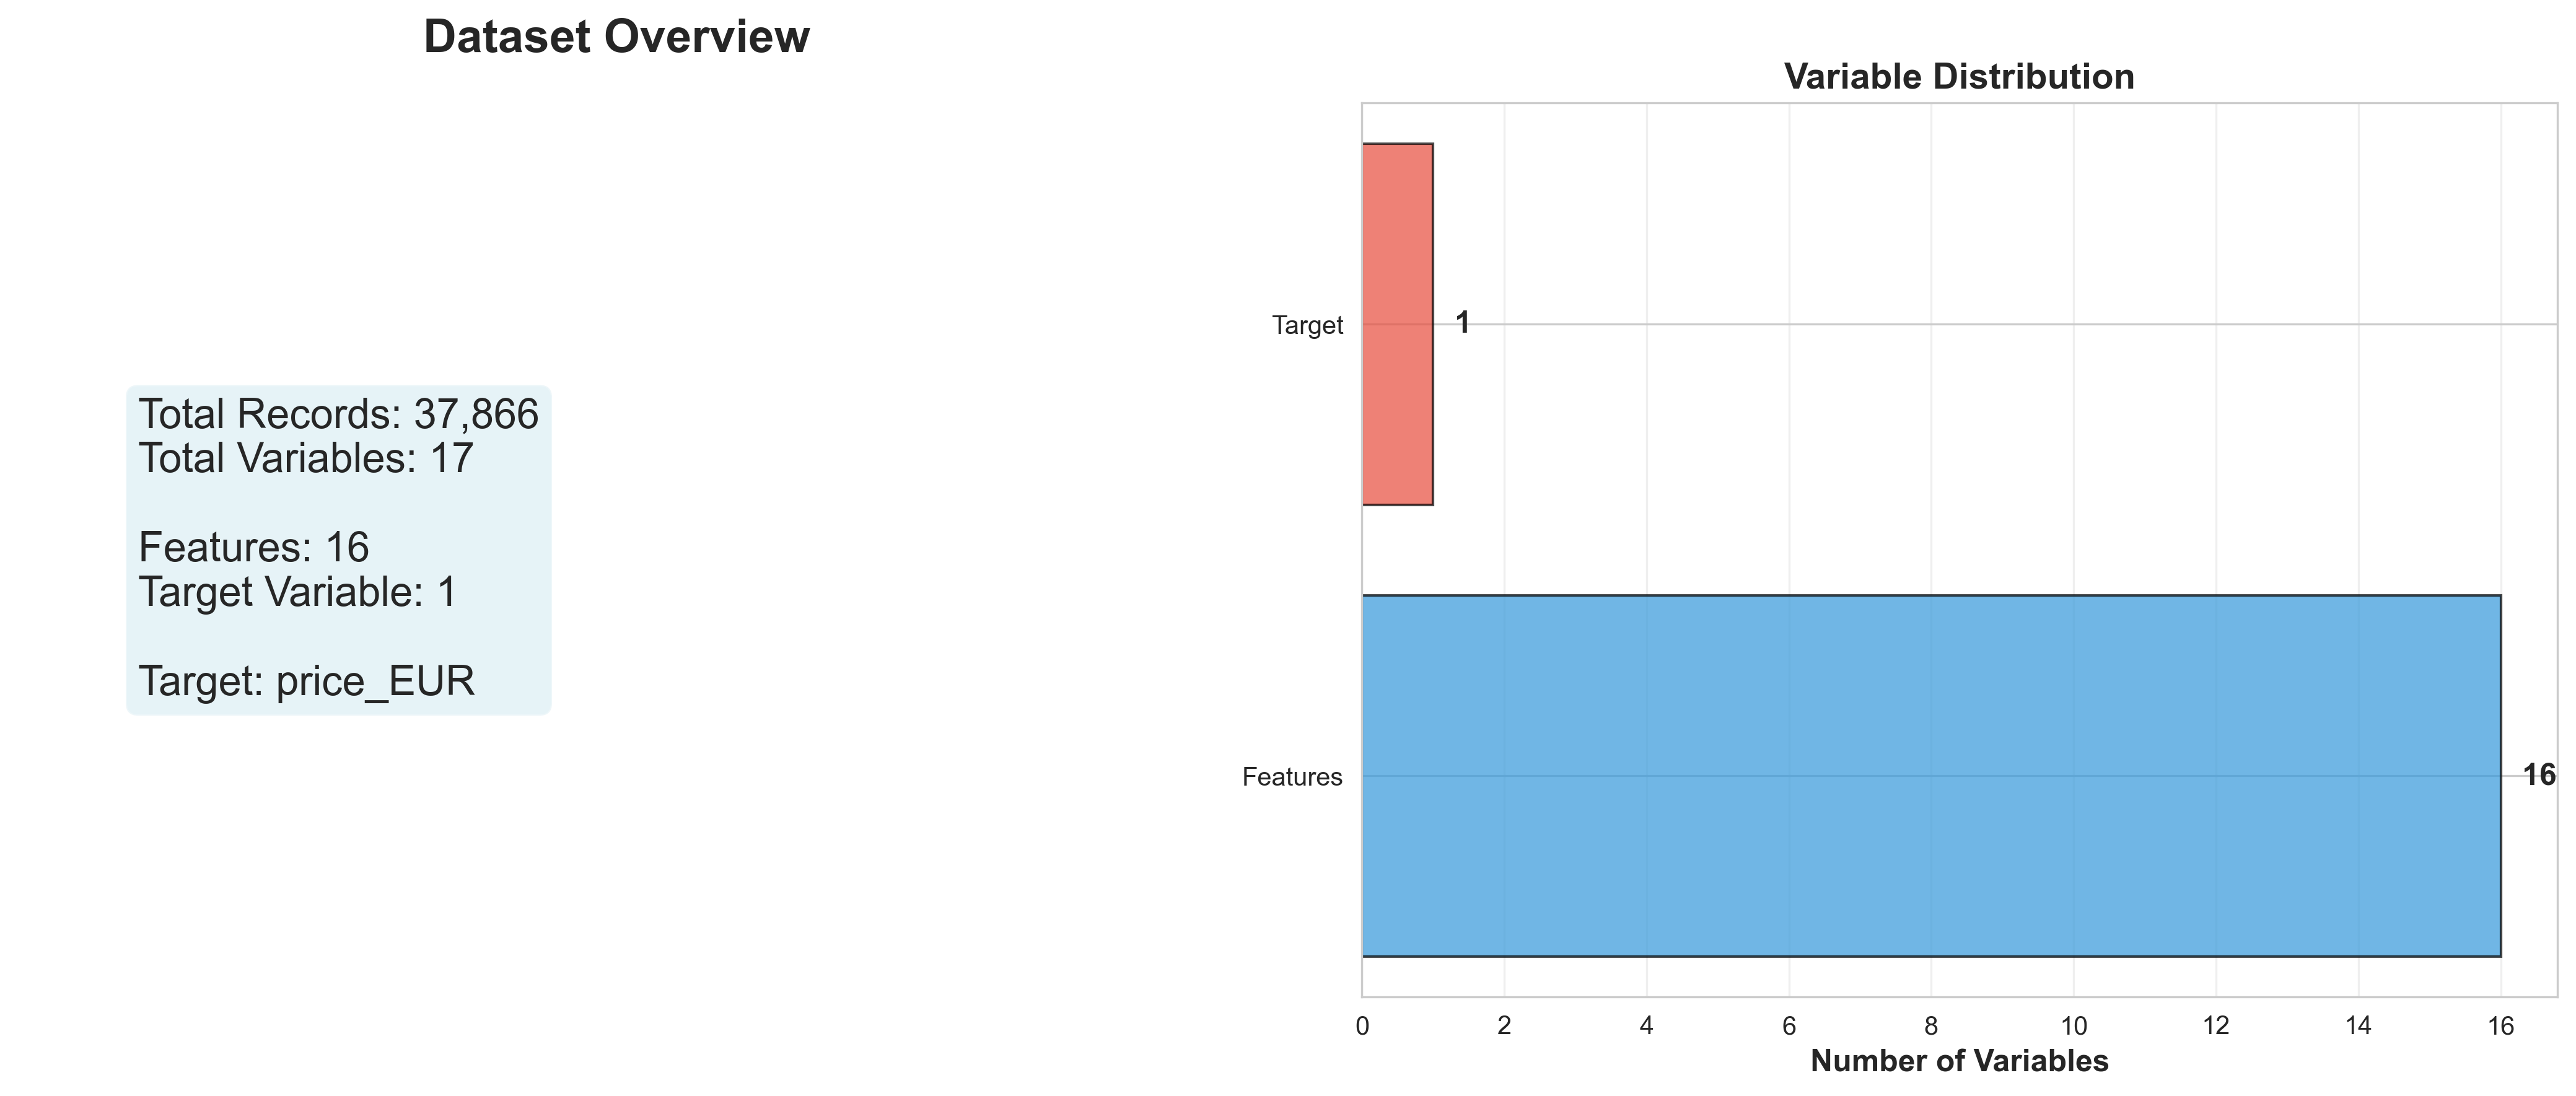

In [16]:
# Visualization 1: Dataset Overview
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel 1: Basic dataset info
info_text = [
    f"Total Records: {df.shape[0]:,}",
    f"Total Variables: {df.shape[1]}",
    f"",
    f"Features: {len(feature_variables)}",
    f"Target Variable: 1",
    f"",
    f"Target: {target_variable}",
]

axes[0].axis('off')
axes[0].text(0.1, 0.5, '\n'.join(info_text), 
             fontsize=16, verticalalignment='center',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
axes[0].set_title('Dataset Overview', fontsize=18, fontweight='bold', pad=20)

# Panel 2: Feature vs Target bar chart
categories = ['Features', 'Target']
counts = [len(feature_variables), 1]
colors = ['#3498db', '#e74c3c']

bars = axes[1].barh(categories, counts, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Number of Variables', fontsize=12, fontweight='bold')
axes[1].set_title('Variable Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, counts)):
    axes[1].text(count + 0.3, i, f'{count}', 
                va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / 'overview.png', bbox_inches='tight', dpi=300)
print("✓ Visualization 1 saved as 'overview.png'")
plt.show()


## Visualization 2: Variable Type Distribution

This visualization shows the frequency of each variable type:
- Numeric: Continuous numerical variables
- Binary: Variables with exactly 2 unique values
- Ordinal: Ordered categorical variables (e.g., months, years)
- Nominal: Unordered categorical variables (e.g., brands, models)


✓ Visualization 2 saved as 'types.png'


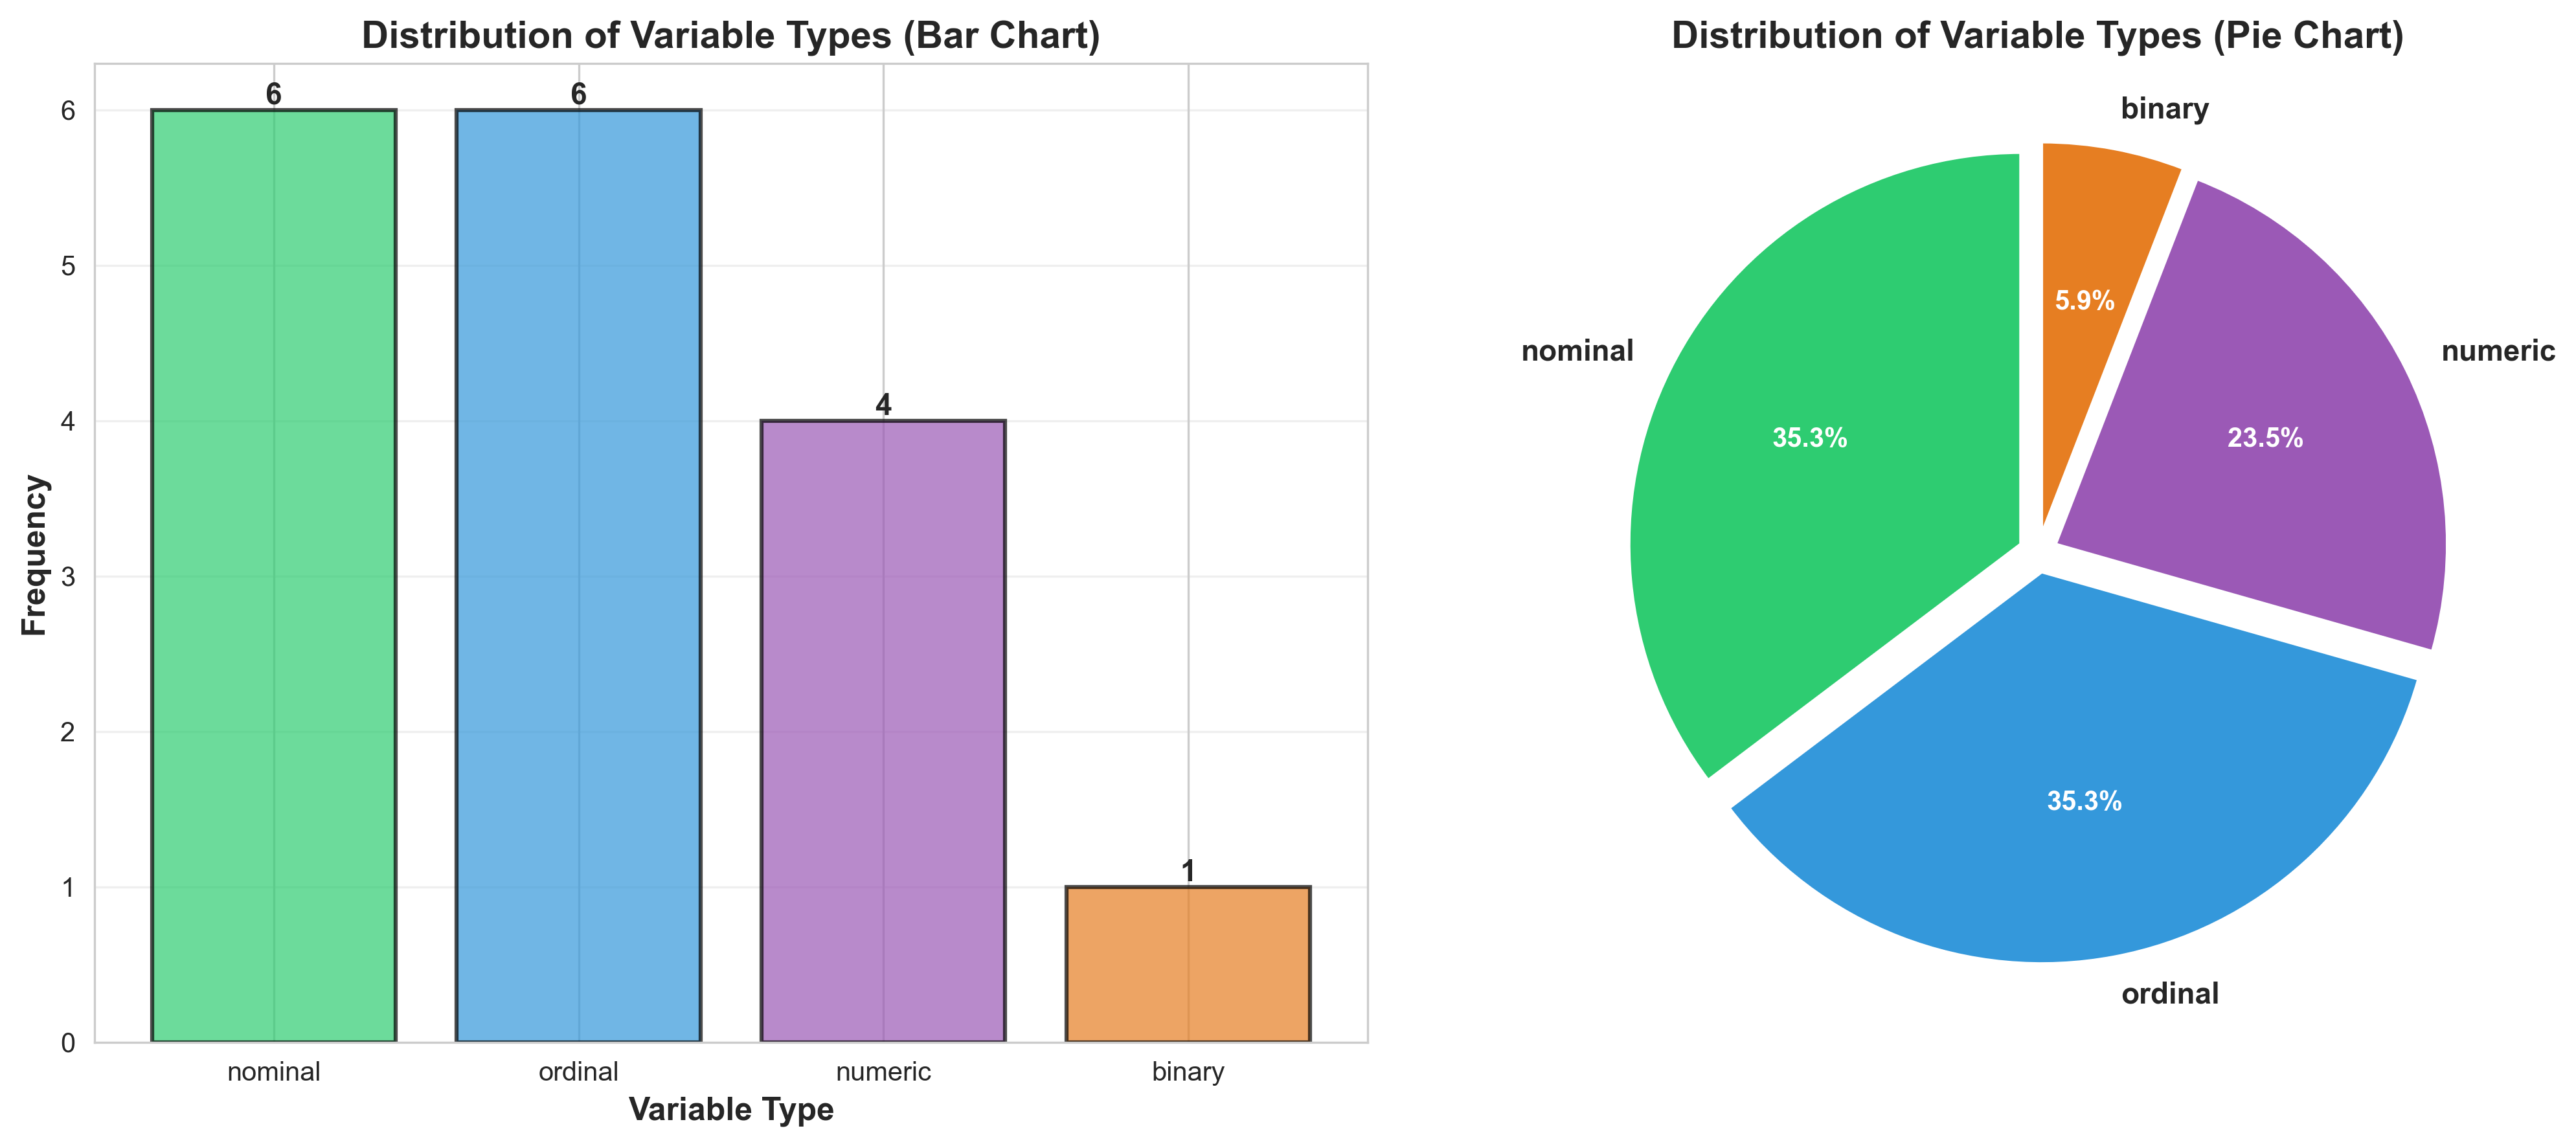


Variable Type Summary:
Type
nominal    6
ordinal    6
numeric    4
binary     1
Name: count, dtype: int64


In [17]:
# Visualization 2: Variable Type Distribution
type_counts = var_summary['Type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Color palette
colors_palette = ['#2ecc71', '#3498db', '#9b59b6', '#e67e22']

# Bar chart
bars = axes[0].bar(type_counts.index, type_counts.values, 
                    color=colors_palette[:len(type_counts)], 
                    alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Variable Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Variable Types (Bar Chart)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
wedges, texts, autotexts = axes[1].pie(type_counts.values, 
                                         labels=type_counts.index,
                                         colors=colors_palette[:len(type_counts)],
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         explode=[0.05]*len(type_counts),
                                         textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Distribution of Variable Types (Pie Chart)', fontsize=14, fontweight='bold')

# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.savefig(output_dir / 'types.png', bbox_inches='tight', dpi=300)
print("✓ Visualization 2 saved as 'types.png'")
plt.show()

print(f"\nVariable Type Summary:")
print(type_counts)


## Visualization 3: Statistical Summary

This visualization includes:
1. A formatted table showing descriptive statistics (mean, std, min, quartiles, max)
2. Boxplots for all numerical variables to visualize distributions and outliers


In [18]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute descriptive statistics
desc_stats = df[numerical_cols].describe().T
desc_stats = desc_stats.round(2)

print("Descriptive Statistics for Numerical Variables:")
print(desc_stats)


Descriptive Statistics for Numerical Variables:
                      count       mean       std     min       25%       50%  \
price_EUR           37866.0    6838.21  11615.92   500.0    1700.0    3950.0   
registration_year   37866.0    2003.53      6.73  1929.0    2000.0    2004.0   
power_ps            37866.0     129.63     64.63     1.0      86.0     116.0   
odometer_km         37866.0  124270.72  39764.87  5000.0  100000.0  150000.0   
registration_month  37866.0       6.40      3.34     1.0       4.0       6.0   
postal_code         37866.0   51743.52  25656.49  1067.0   31368.0   50998.0   

                         75%       max  
price_EUR             8500.0  820000.0  
registration_year     2008.0    2016.0  
power_ps               156.0    1403.0  
odometer_km         150000.0  150000.0  
registration_month       9.0      12.0  
postal_code          72469.0   99998.0  


C:\Users\carls\AppData\Local\Temp\ipykernel_7384\2457930951.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Visualization 3 saved as 'summary.png'


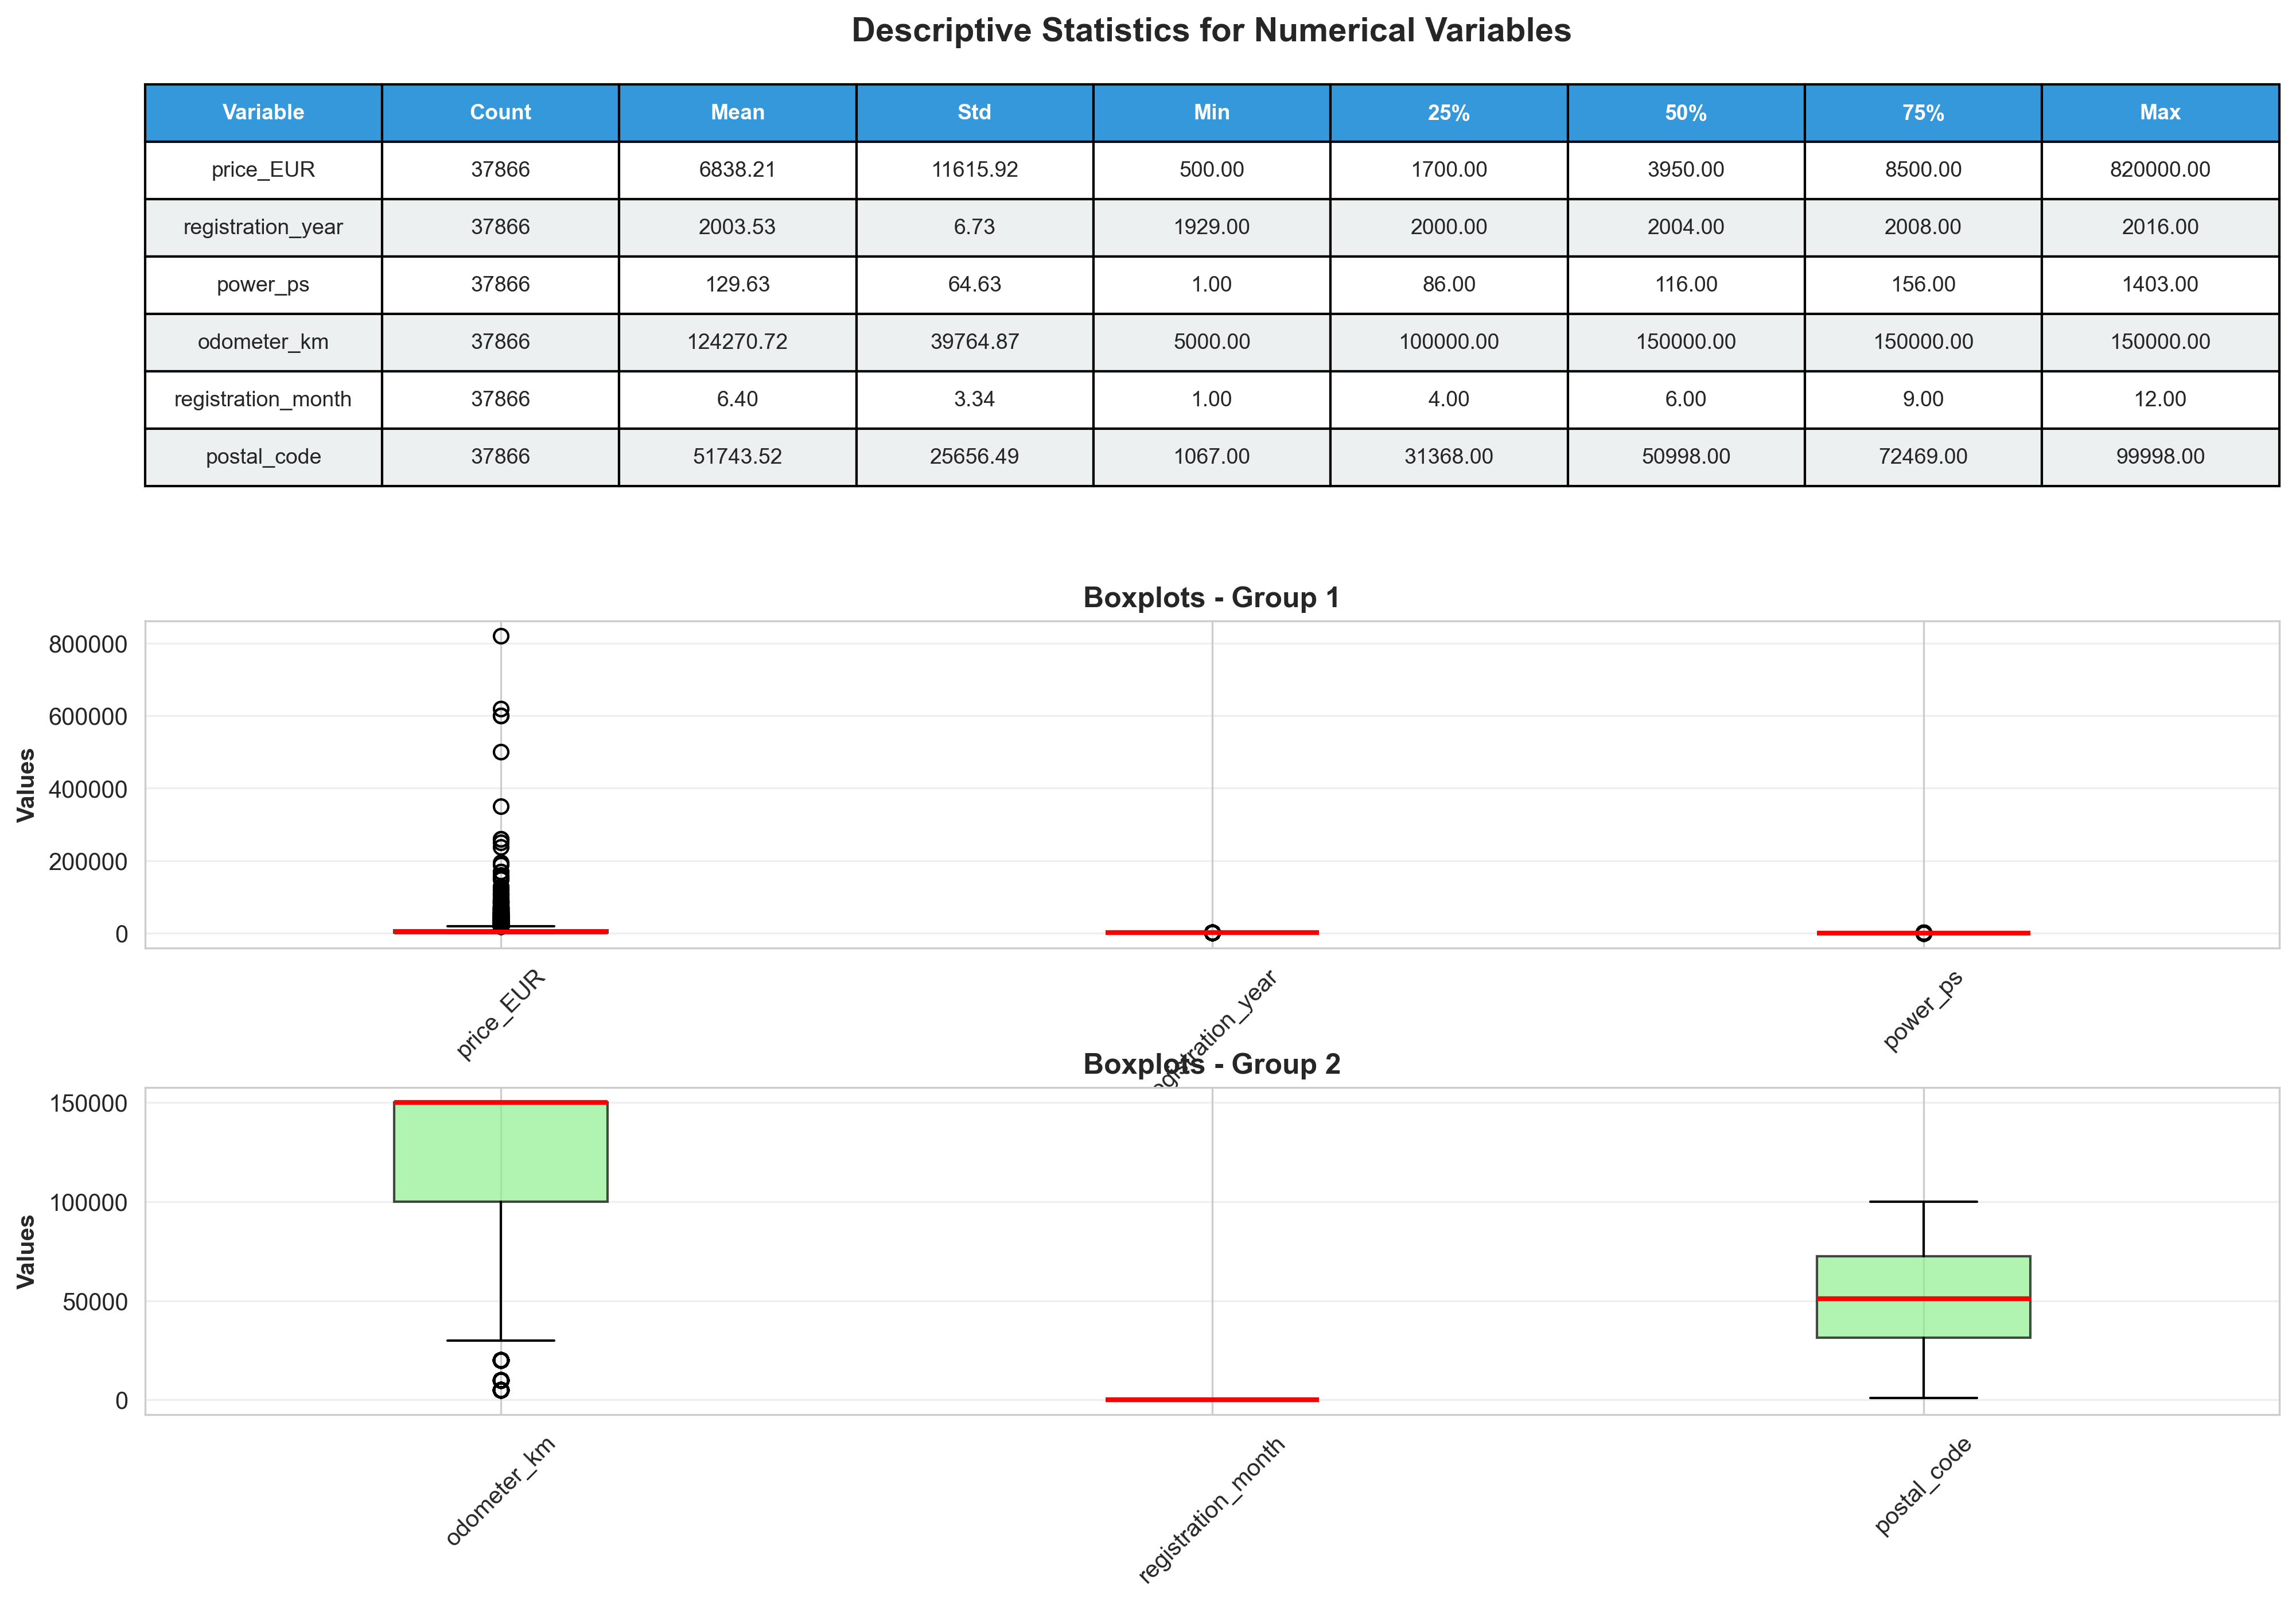

In [19]:
# Visualization 3: Statistical Summary
fig = plt.figure(figsize=(16, 10))

# Create a grid for subplots
gs = fig.add_gridspec(3, 1, height_ratios=[1.2, 1, 1], hspace=0.4)

# Subplot 1: Table with descriptive statistics
ax1 = fig.add_subplot(gs[0])
ax1.axis('tight')
ax1.axis('off')

# Prepare table data
table_data = []
table_data.append(['Variable', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'])
for idx, row in desc_stats.iterrows():
    table_data.append([
        idx,
        f"{row['count']:.0f}",
        f"{row['mean']:.2f}",
        f"{row['std']:.2f}",
        f"{row['min']:.2f}",
        f"{row['25%']:.2f}",
        f"{row['50%']:.2f}",
        f"{row['75%']:.2f}",
        f"{row['max']:.2f}"
    ])

table = ax1.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style the header row
for i in range(len(table_data[0])):
    cell = table[(0, i)]
    cell.set_facecolor('#3498db')
    cell.set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(table_data)):
    for j in range(len(table_data[0])):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#ecf0f1')
        else:
            cell.set_facecolor('#ffffff')

ax1.set_title('Descriptive Statistics for Numerical Variables', 
              fontsize=14, fontweight='bold', pad=20)

# Subplot 2 & 3: Boxplots
# Split numerical columns into two groups for better visualization
mid_point = len(numerical_cols) // 2

ax2 = fig.add_subplot(gs[1])
df[numerical_cols[:mid_point]].boxplot(ax=ax2, patch_artist=True, 
                                        boxprops=dict(facecolor='lightblue', alpha=0.7),
                                        medianprops=dict(color='red', linewidth=2),
                                        whiskerprops=dict(color='black'),
                                        capprops=dict(color='black'))
ax2.set_title('Boxplots - Group 1', fontsize=12, fontweight='bold')
ax2.set_ylabel('Values', fontsize=10, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

ax3 = fig.add_subplot(gs[2])
df[numerical_cols[mid_point:]].boxplot(ax=ax3, patch_artist=True,
                                        boxprops=dict(facecolor='lightgreen', alpha=0.7),
                                        medianprops=dict(color='red', linewidth=2),
                                        whiskerprops=dict(color='black'),
                                        capprops=dict(color='black'))
ax3.set_title('Boxplots - Group 2', fontsize=12, fontweight='bold')
ax3.set_ylabel('Values', fontsize=10, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'summary.png', bbox_inches='tight', dpi=300)
print("✓ Visualization 3 saved as 'summary.png'")
plt.show()


## Summary

All three visualizations have been generated and saved:

1. **overview.png** - Dataset overview showing total records, variables, and feature/target distinction
2. **types.png** - Variable type distribution (numeric, binary, ordinal, nominal)
3. **summary.png** - Statistical summary with descriptive statistics table and boxplots

These high-quality visualizations are ready for inclusion in your project report!


---

## Categorical Variable Distributions

Detailed analysis of key categorical and ordinal variables:
- Vehicle Type
- Transmission
- Fuel Type
- Brand
- Unrepaired Damage

Each visualization shows frequency counts, ordered by most common categories.


In [20]:
# Define the categorical variables to analyze
categorical_vars = ['vehicle_type', 'transmission', 'fuel_type', 'brand', 'unrepaired_damage']

# Define consistent color palette for professional look
color_palette = sns.color_palette("Set2", 15)

# Function to create individual bar chart for each variable
def create_distribution_plot(data, variable, save_name, color_palette):
    """
    Create a publication-quality bar chart for a categorical variable.
    Handles missing values and orders by frequency.
    """
    # Create a copy and handle missing values
    var_data = data[variable].copy()
    var_data = var_data.fillna('Desconocido / Missing')
    
    # Count frequencies and sort
    value_counts = var_data.value_counts()
    total = len(var_data)
    percentages = (value_counts / total * 100).round(2)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create bar chart
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                   color=color_palette[:len(value_counts)], 
                   alpha=0.8, edgecolor='black', linewidth=1.2)
    
    # Customize plot
    ax.set_xlabel('Category', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency (Count)', fontsize=12, fontweight='bold')
    ax.set_title(f'Distribution of {variable.replace("_", " ").title()}', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Set x-axis labels
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Add grid
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    # Add value labels and percentages on bars
    for i, (bar, count, pct) in enumerate(zip(bars, value_counts.values, percentages.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}\n({pct}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    save_path = output_dir / save_name
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    print(f"✓ Saved: {save_name}")
    
    plt.show()
    
    return value_counts, percentages

print("Function defined successfully!")


Function defined successfully!


### 1. Vehicle Type Distribution


✓ Saved: vehicle_type_distribution.png


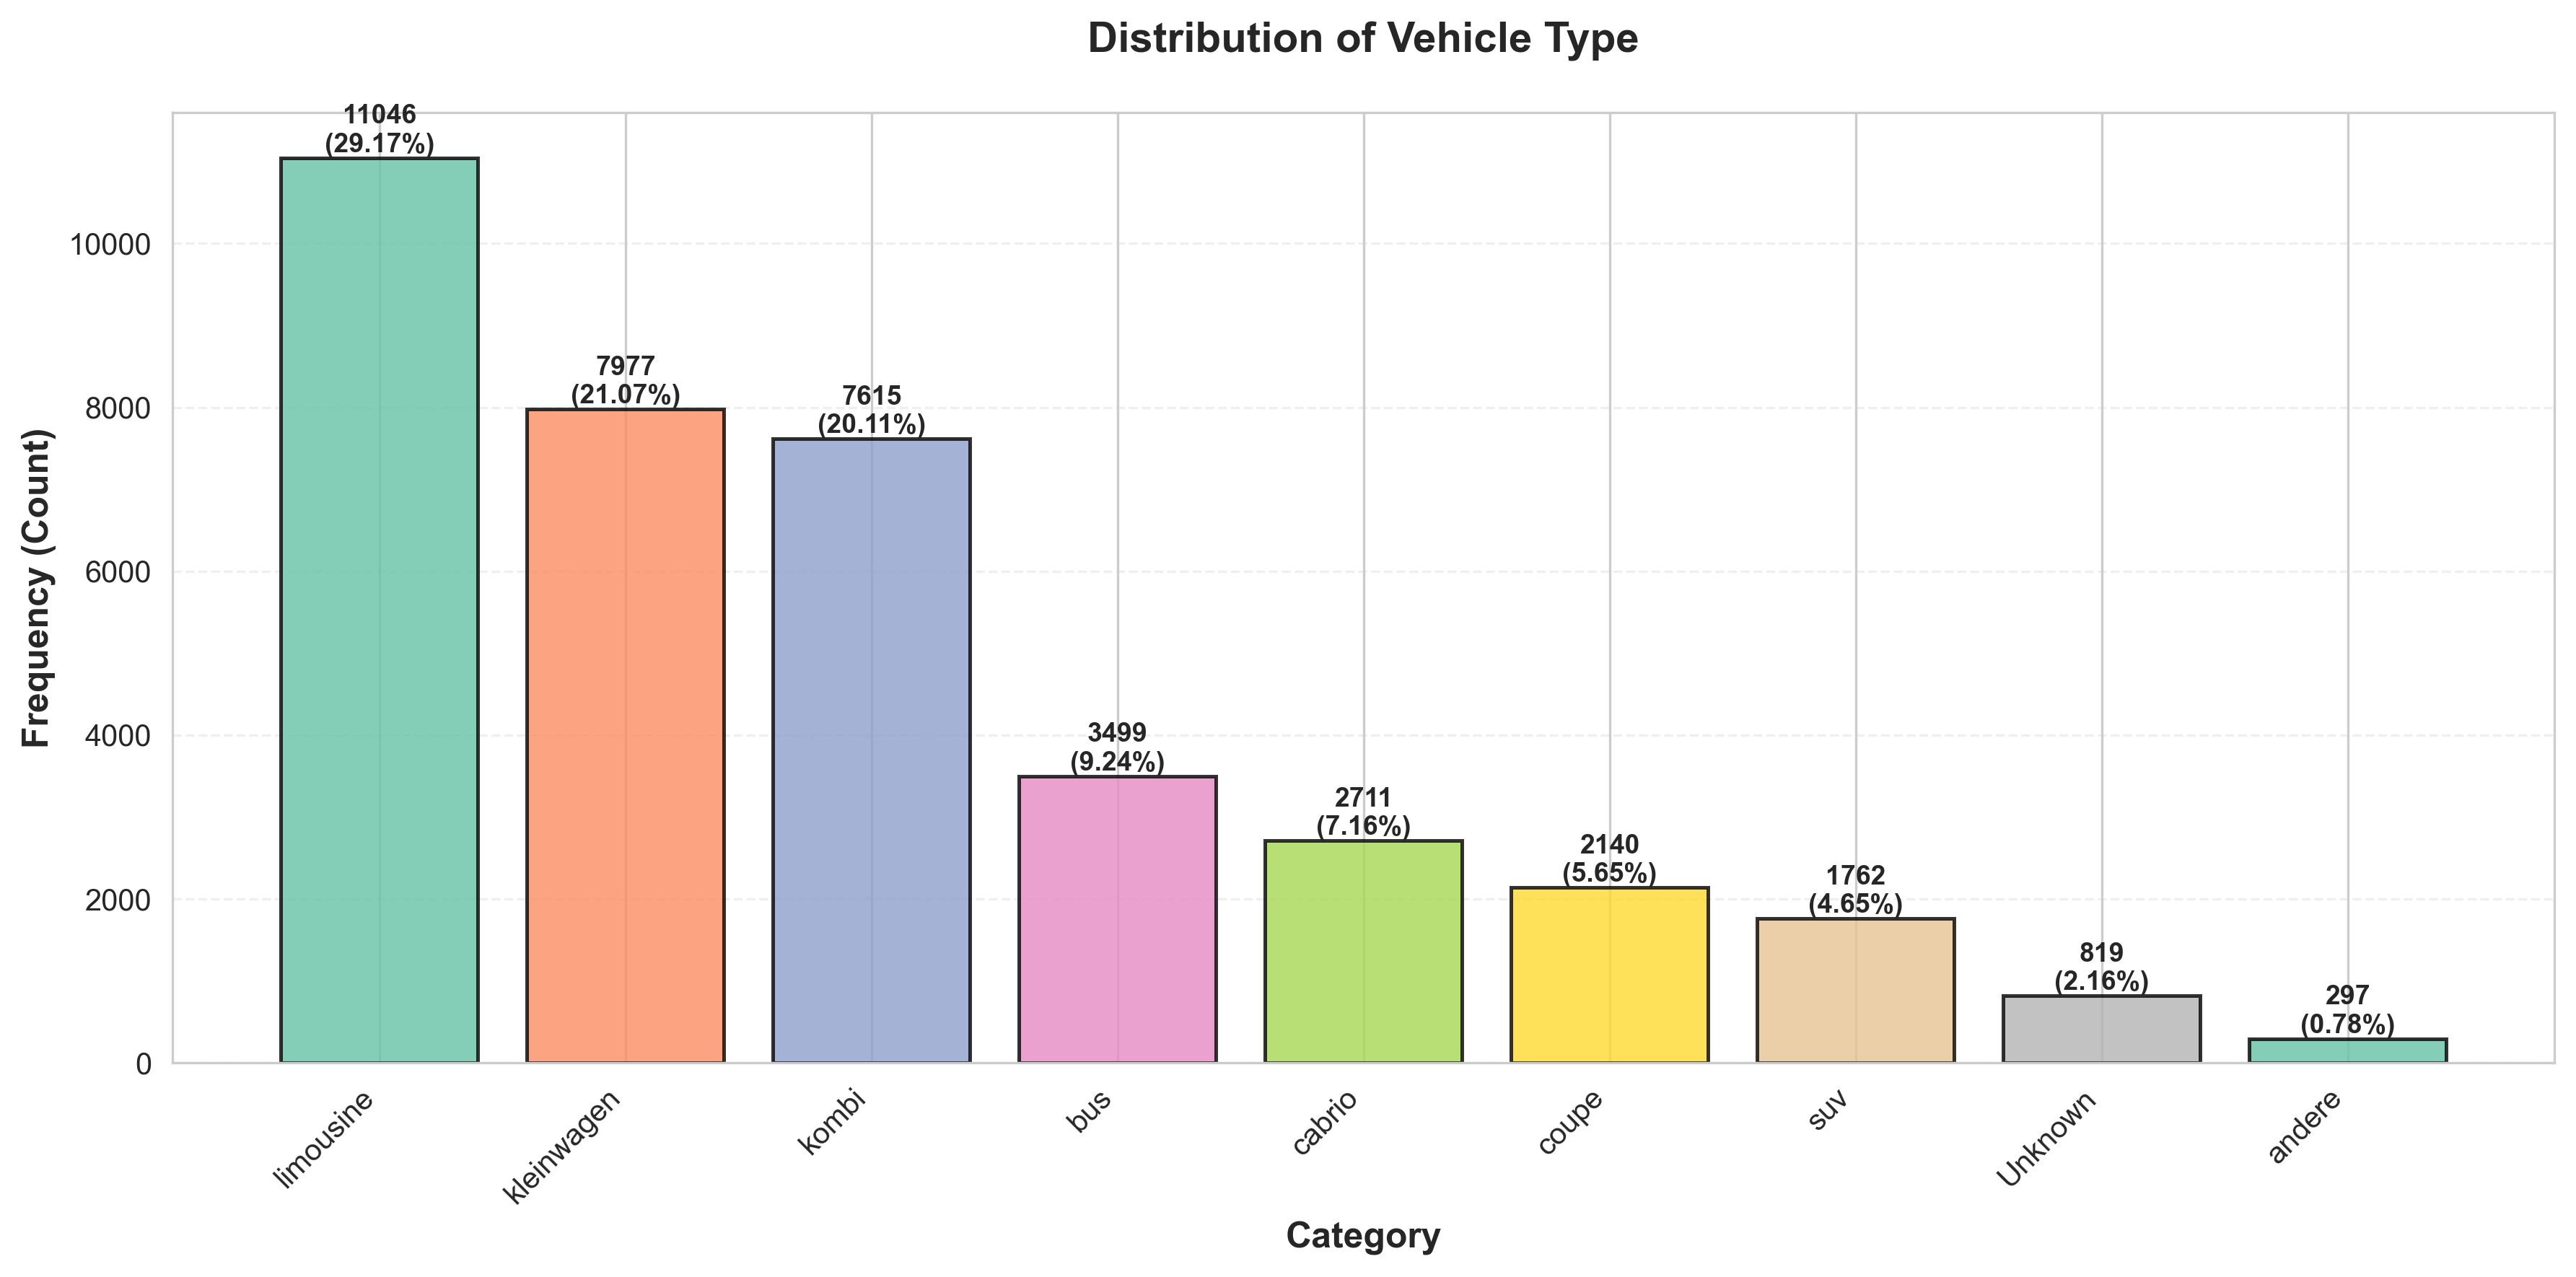


Vehicle Type Summary:
Total categories: 9
Most common: limousine (11046 vehicles, 29.17%)


In [21]:
# Vehicle Type Distribution
counts_vt, pct_vt = create_distribution_plot(df, 'vehicle_type', 
                                              'vehicle_type_distribution.png', 
                                              color_palette)

print("\nVehicle Type Summary:")
print(f"Total categories: {len(counts_vt)}")
print(f"Most common: {counts_vt.index[0]} ({counts_vt.values[0]} vehicles, {pct_vt.values[0]}%)")


### 2. Transmission Distribution


✓ Saved: transmission_distribution.png


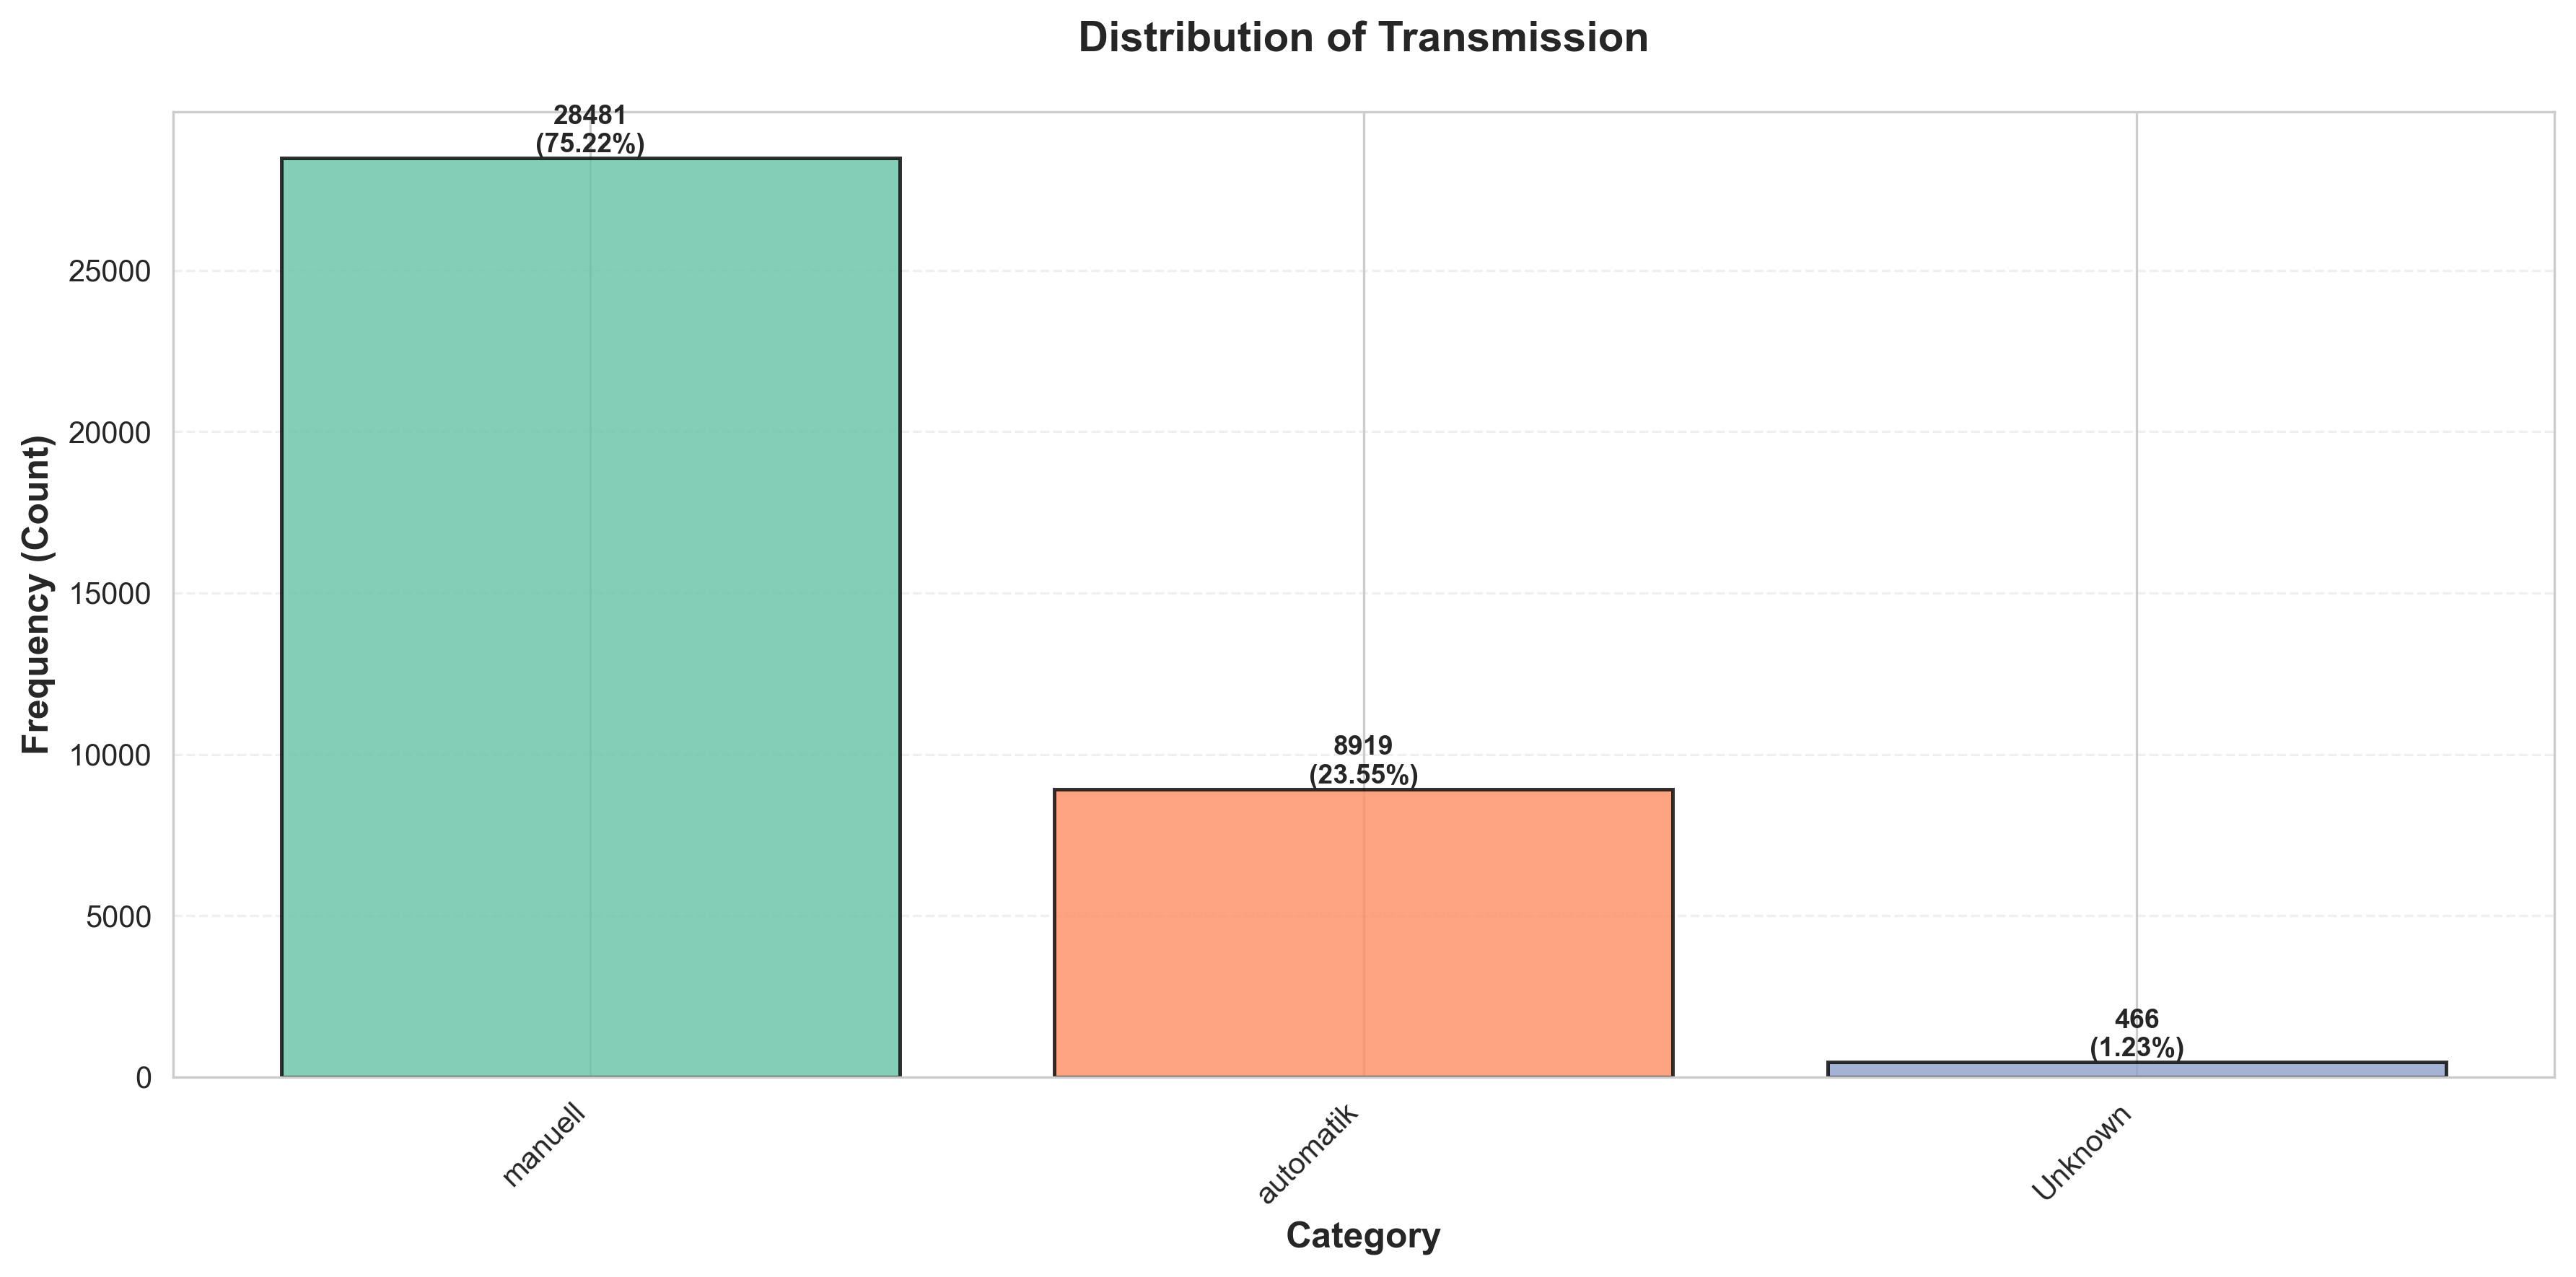


Transmission Summary:
Total categories: 3
Most common: manuell (28481 vehicles, 75.22%)


In [22]:
# Transmission Distribution
counts_trans, pct_trans = create_distribution_plot(df, 'transmission', 
                                                    'transmission_distribution.png', 
                                                    color_palette)

print("\nTransmission Summary:")
print(f"Total categories: {len(counts_trans)}")
print(f"Most common: {counts_trans.index[0]} ({counts_trans.values[0]} vehicles, {pct_trans.values[0]}%)")


### 3. Fuel Type Distribution


✓ Saved: fuel_type_distribution.png


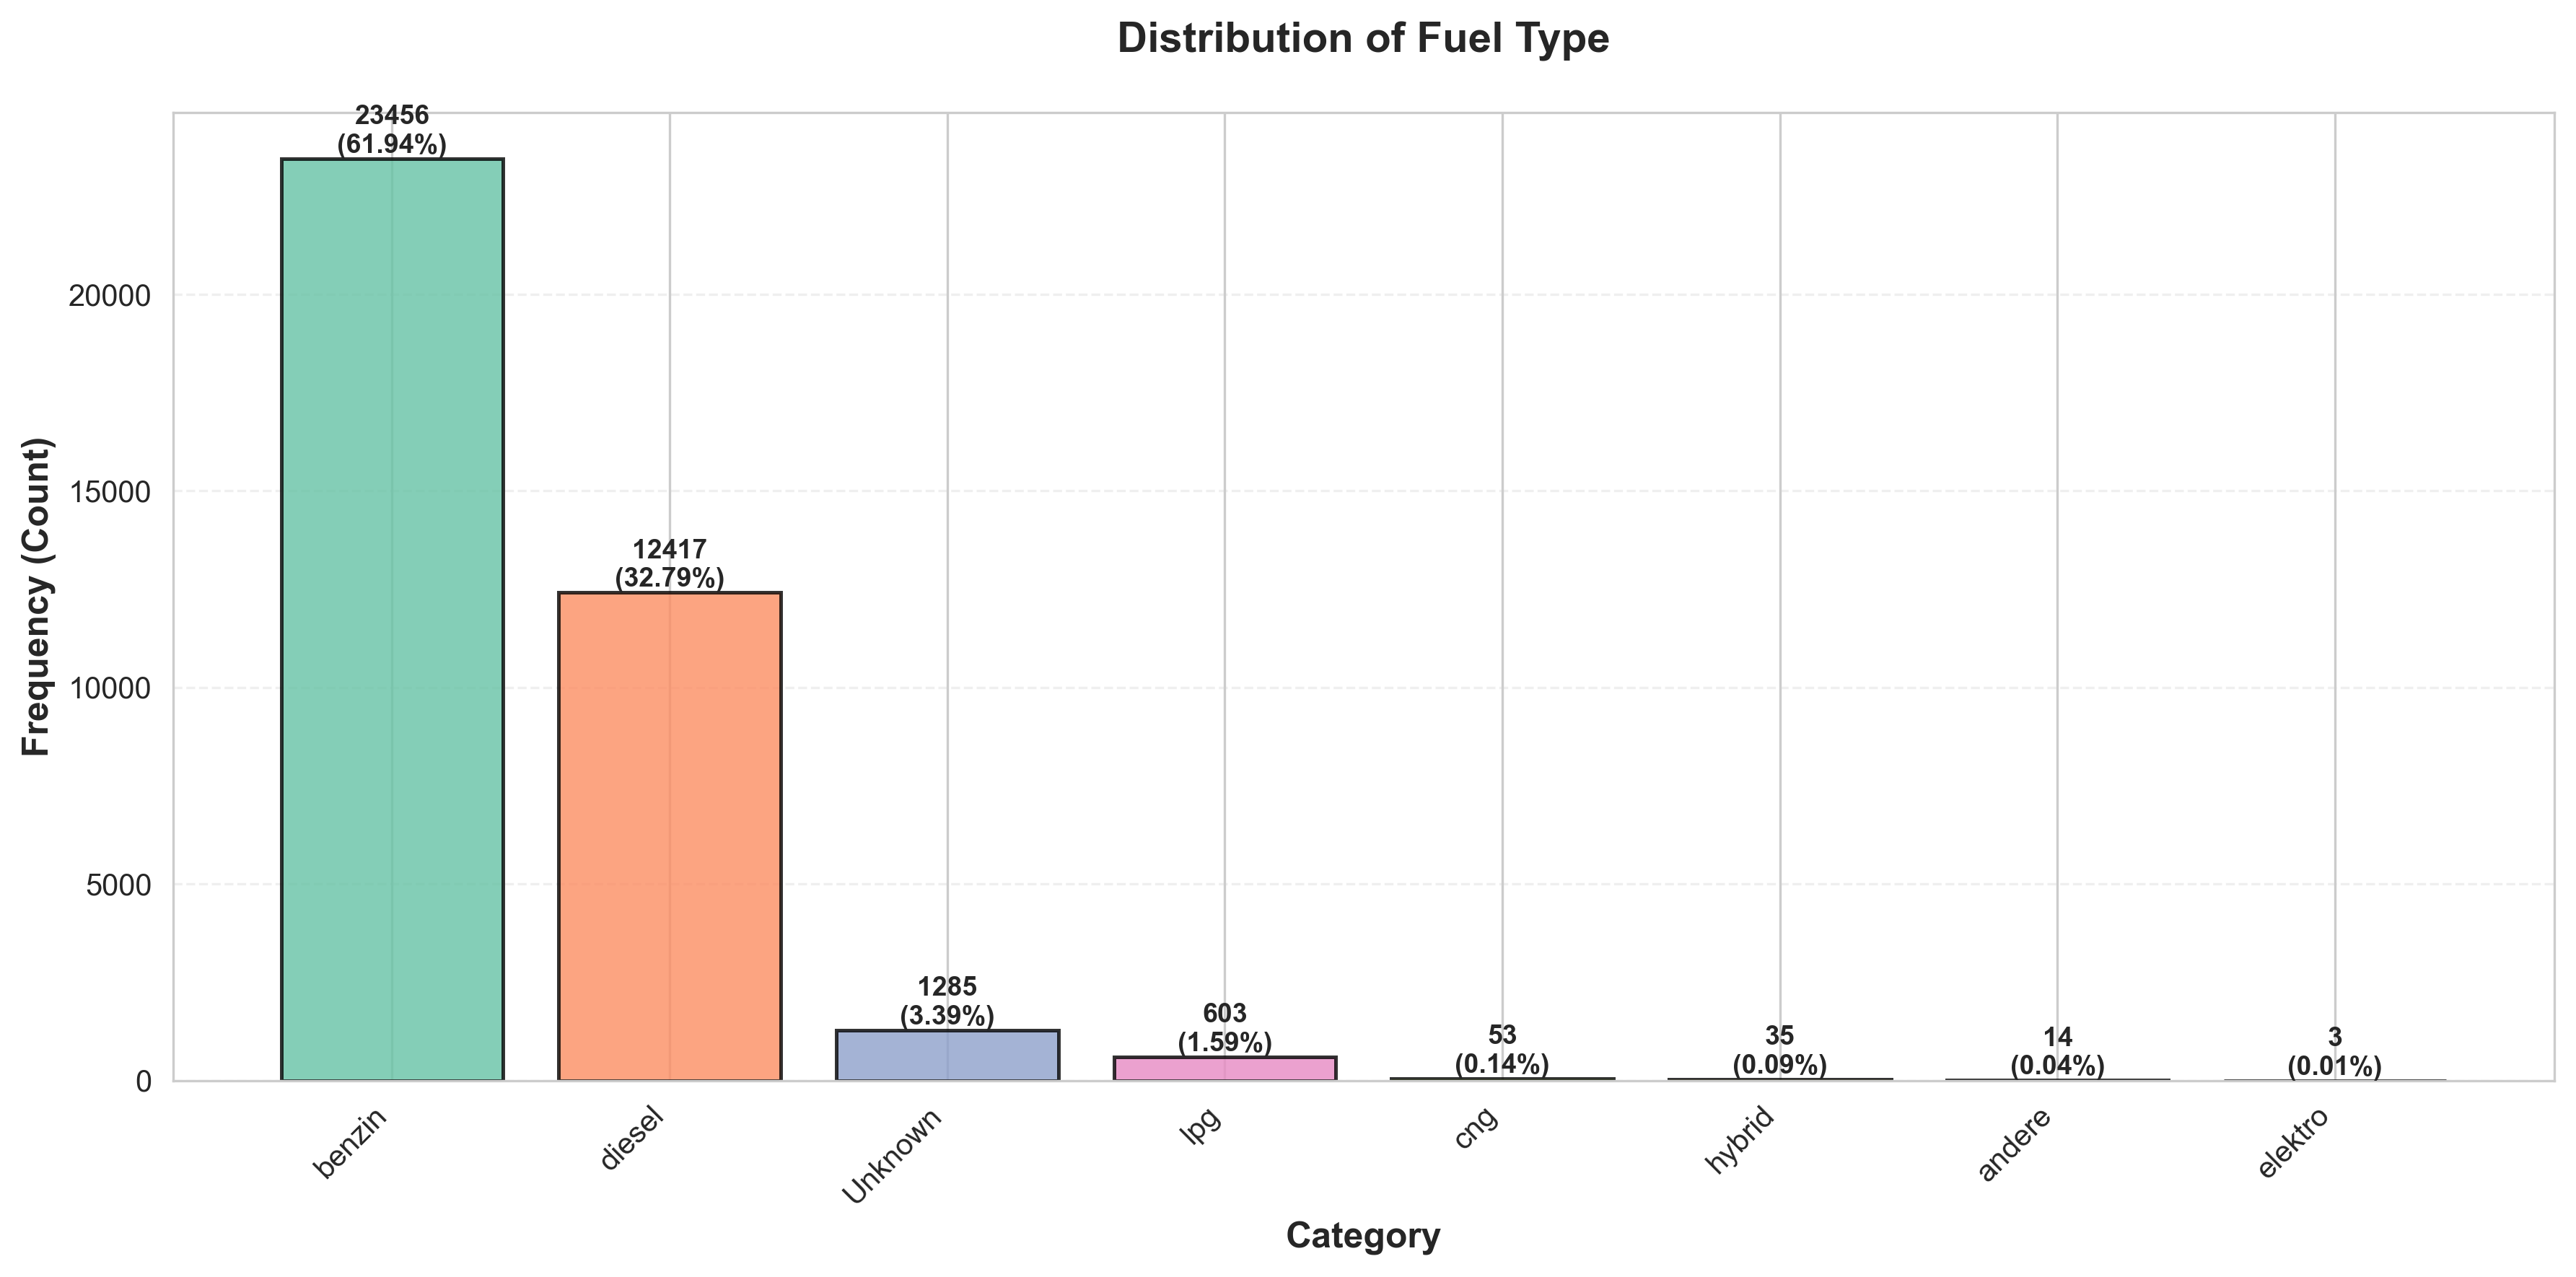


Fuel Type Summary:
Total categories: 8
Most common: benzin (23456 vehicles, 61.94%)


In [23]:
# Fuel Type Distribution
counts_fuel, pct_fuel = create_distribution_plot(df, 'fuel_type', 
                                                  'fuel_type_distribution.png', 
                                                  color_palette)

print("\nFuel Type Summary:")
print(f"Total categories: {len(counts_fuel)}")
print(f"Most common: {counts_fuel.index[0]} ({counts_fuel.values[0]} vehicles, {pct_fuel.values[0]}%)")


### 4. Brand Distribution


Note: Showing top 15 brands out of 40 total brands
✓ Saved: brand_distribution.png


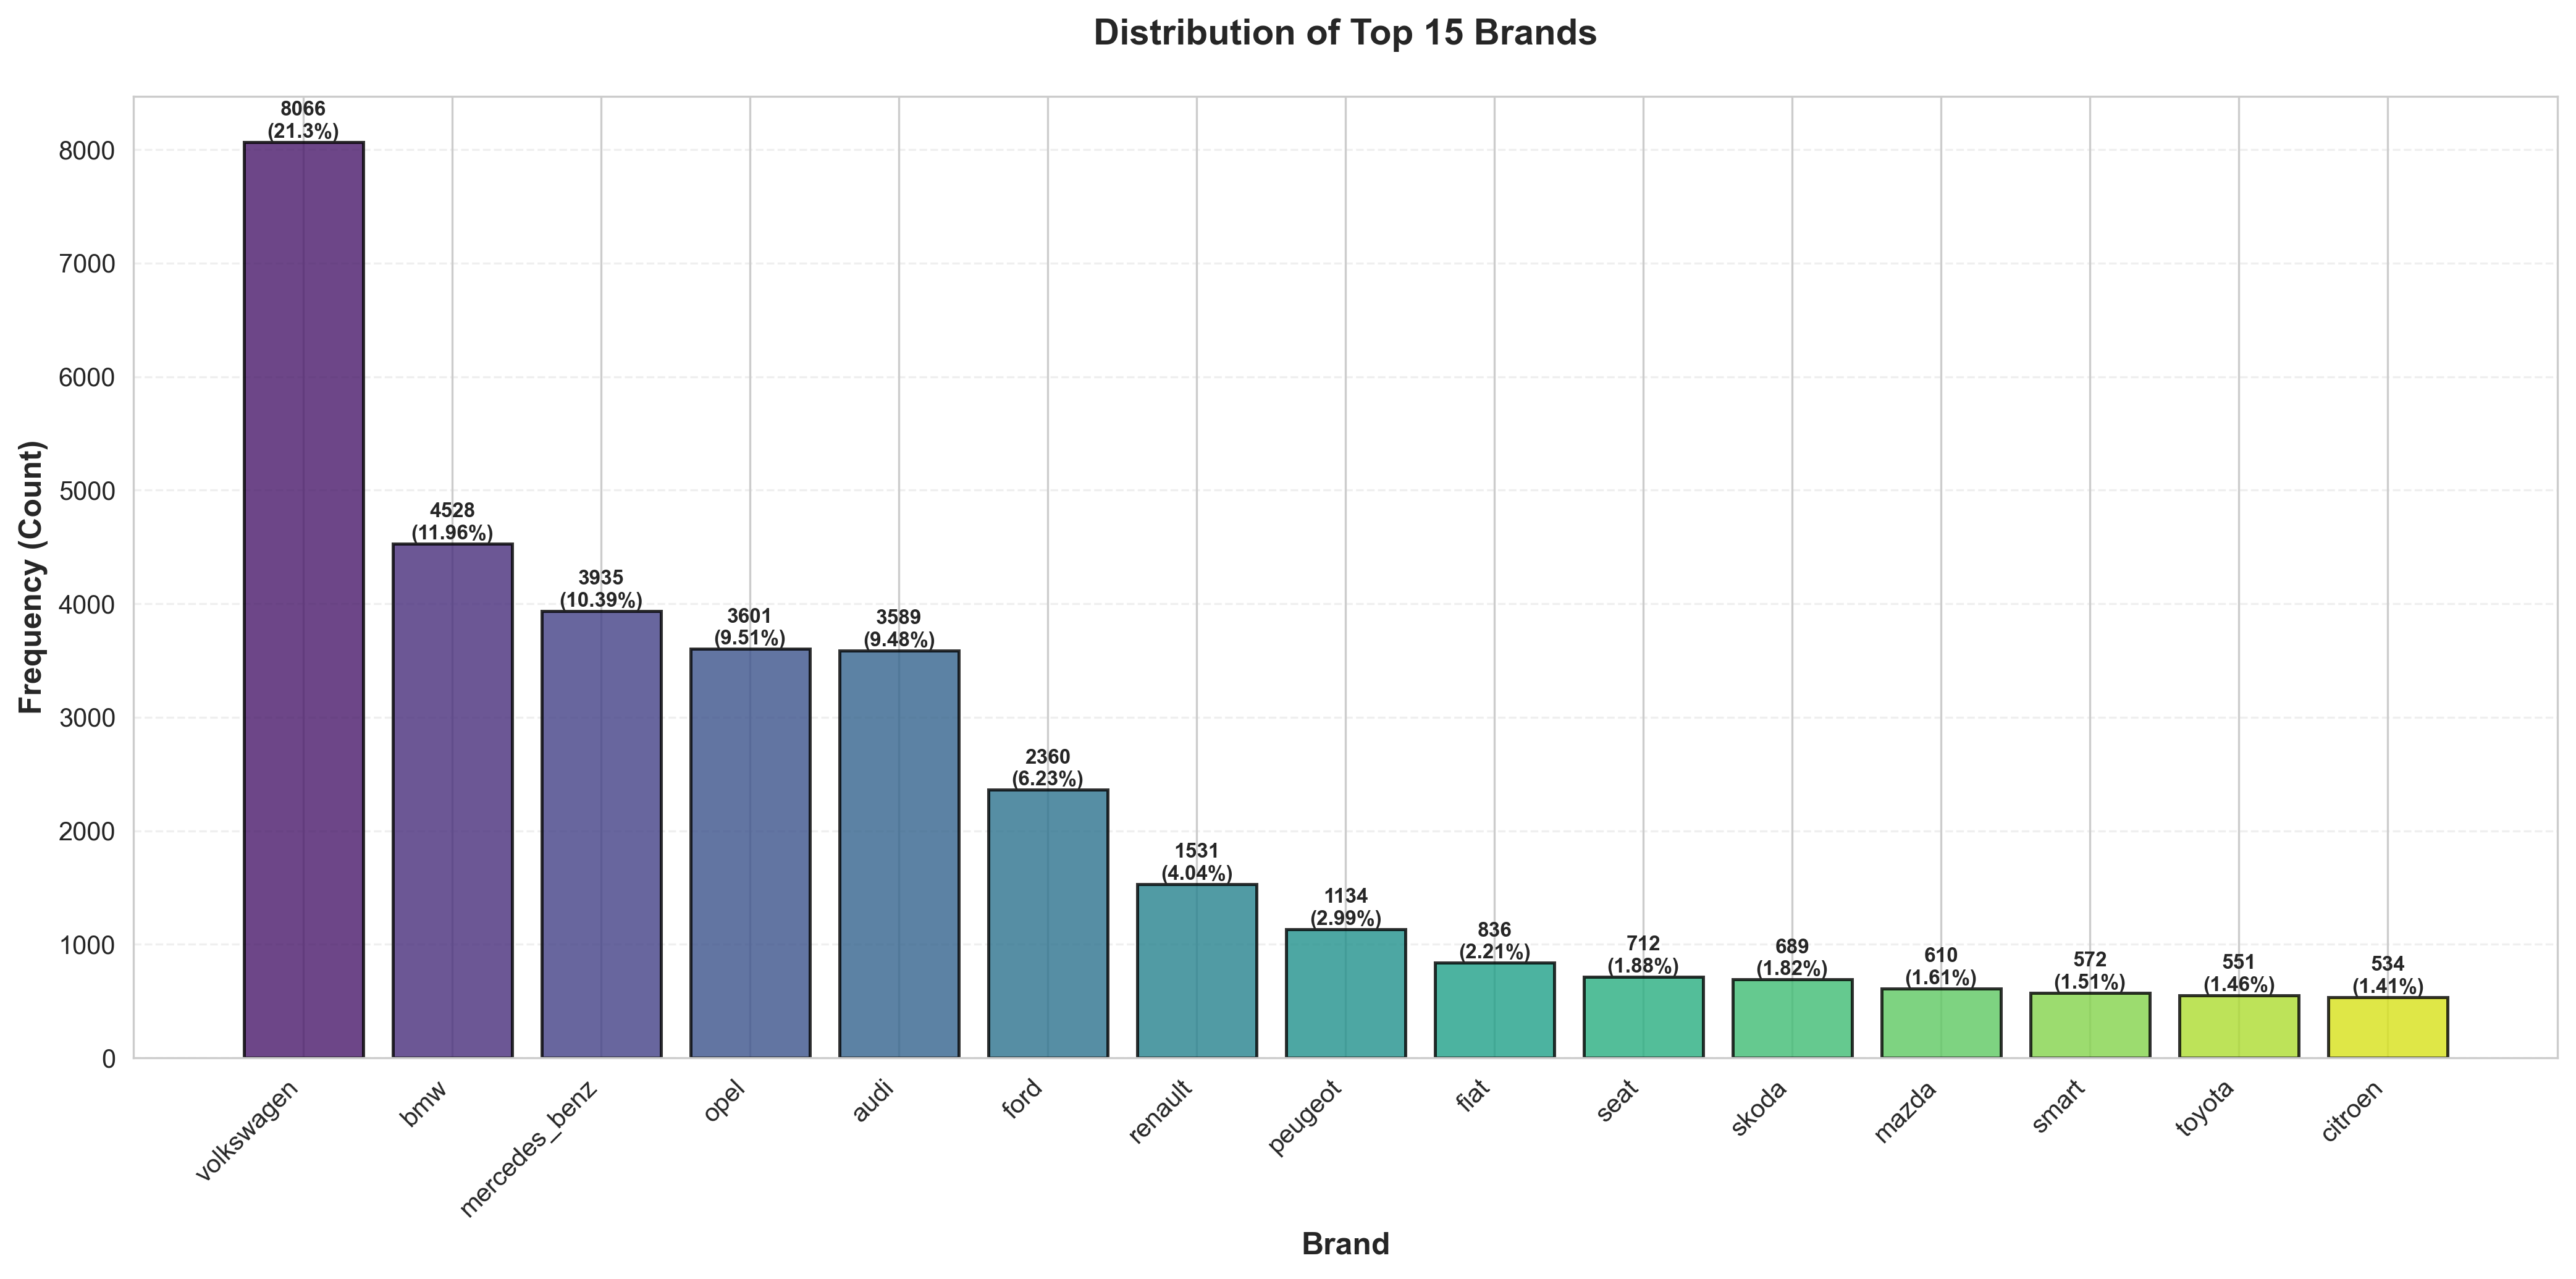


Brand Summary:
Total brands: 40
Most common: volkswagen (8066 vehicles, 21.3%)


In [24]:
# Brand Distribution
# For brand, we might have many categories, so let's use a larger figure
def create_brand_distribution_plot(data, variable, save_name):
    """
    Special function for brand distribution with many categories.
    """
    # Create a copy and handle missing values
    var_data = data[variable].copy()
    var_data = var_data.fillna('Desconocido / Missing')
    
    # Count frequencies and sort
    value_counts = var_data.value_counts()
    total = len(var_data)
    percentages = (value_counts / total * 100).round(2)
    
    # Limit to top 15 brands for readability
    top_n = 15
    if len(value_counts) > top_n:
        value_counts_plot = value_counts.head(top_n)
        percentages_plot = percentages.head(top_n)
        print(f"Note: Showing top {top_n} brands out of {len(value_counts)} total brands")
    else:
        value_counts_plot = value_counts
        percentages_plot = percentages
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Create bar chart with gradient colors
    colors = sns.color_palette("viridis", len(value_counts_plot))
    bars = ax.bar(range(len(value_counts_plot)), value_counts_plot.values, 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
    
    # Customize plot
    ax.set_xlabel('Brand', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency (Count)', fontsize=12, fontweight='bold')
    ax.set_title(f'Distribution of Top {len(value_counts_plot)} Brands', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Set x-axis labels
    ax.set_xticks(range(len(value_counts_plot)))
    ax.set_xticklabels(value_counts_plot.index, rotation=45, ha='right', fontsize=10)
    
    # Add grid
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    # Add value labels and percentages on bars
    for i, (bar, count, pct) in enumerate(zip(bars, value_counts_plot.values, percentages_plot.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}\n({pct}%)',
                ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    save_path = output_dir / save_name
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    print(f"✓ Saved: {save_name}")
    
    plt.show()
    
    return value_counts, percentages

# Create brand distribution
counts_brand, pct_brand = create_brand_distribution_plot(df, 'brand', 
                                                          'brand_distribution.png')

print("\nBrand Summary:")
print(f"Total brands: {len(counts_brand)}")
print(f"Most common: {counts_brand.index[0]} ({counts_brand.values[0]} vehicles, {pct_brand.values[0]}%)")


### 5. Unrepaired Damage Distribution


✓ Saved: unrepaired_damage_distribution.png


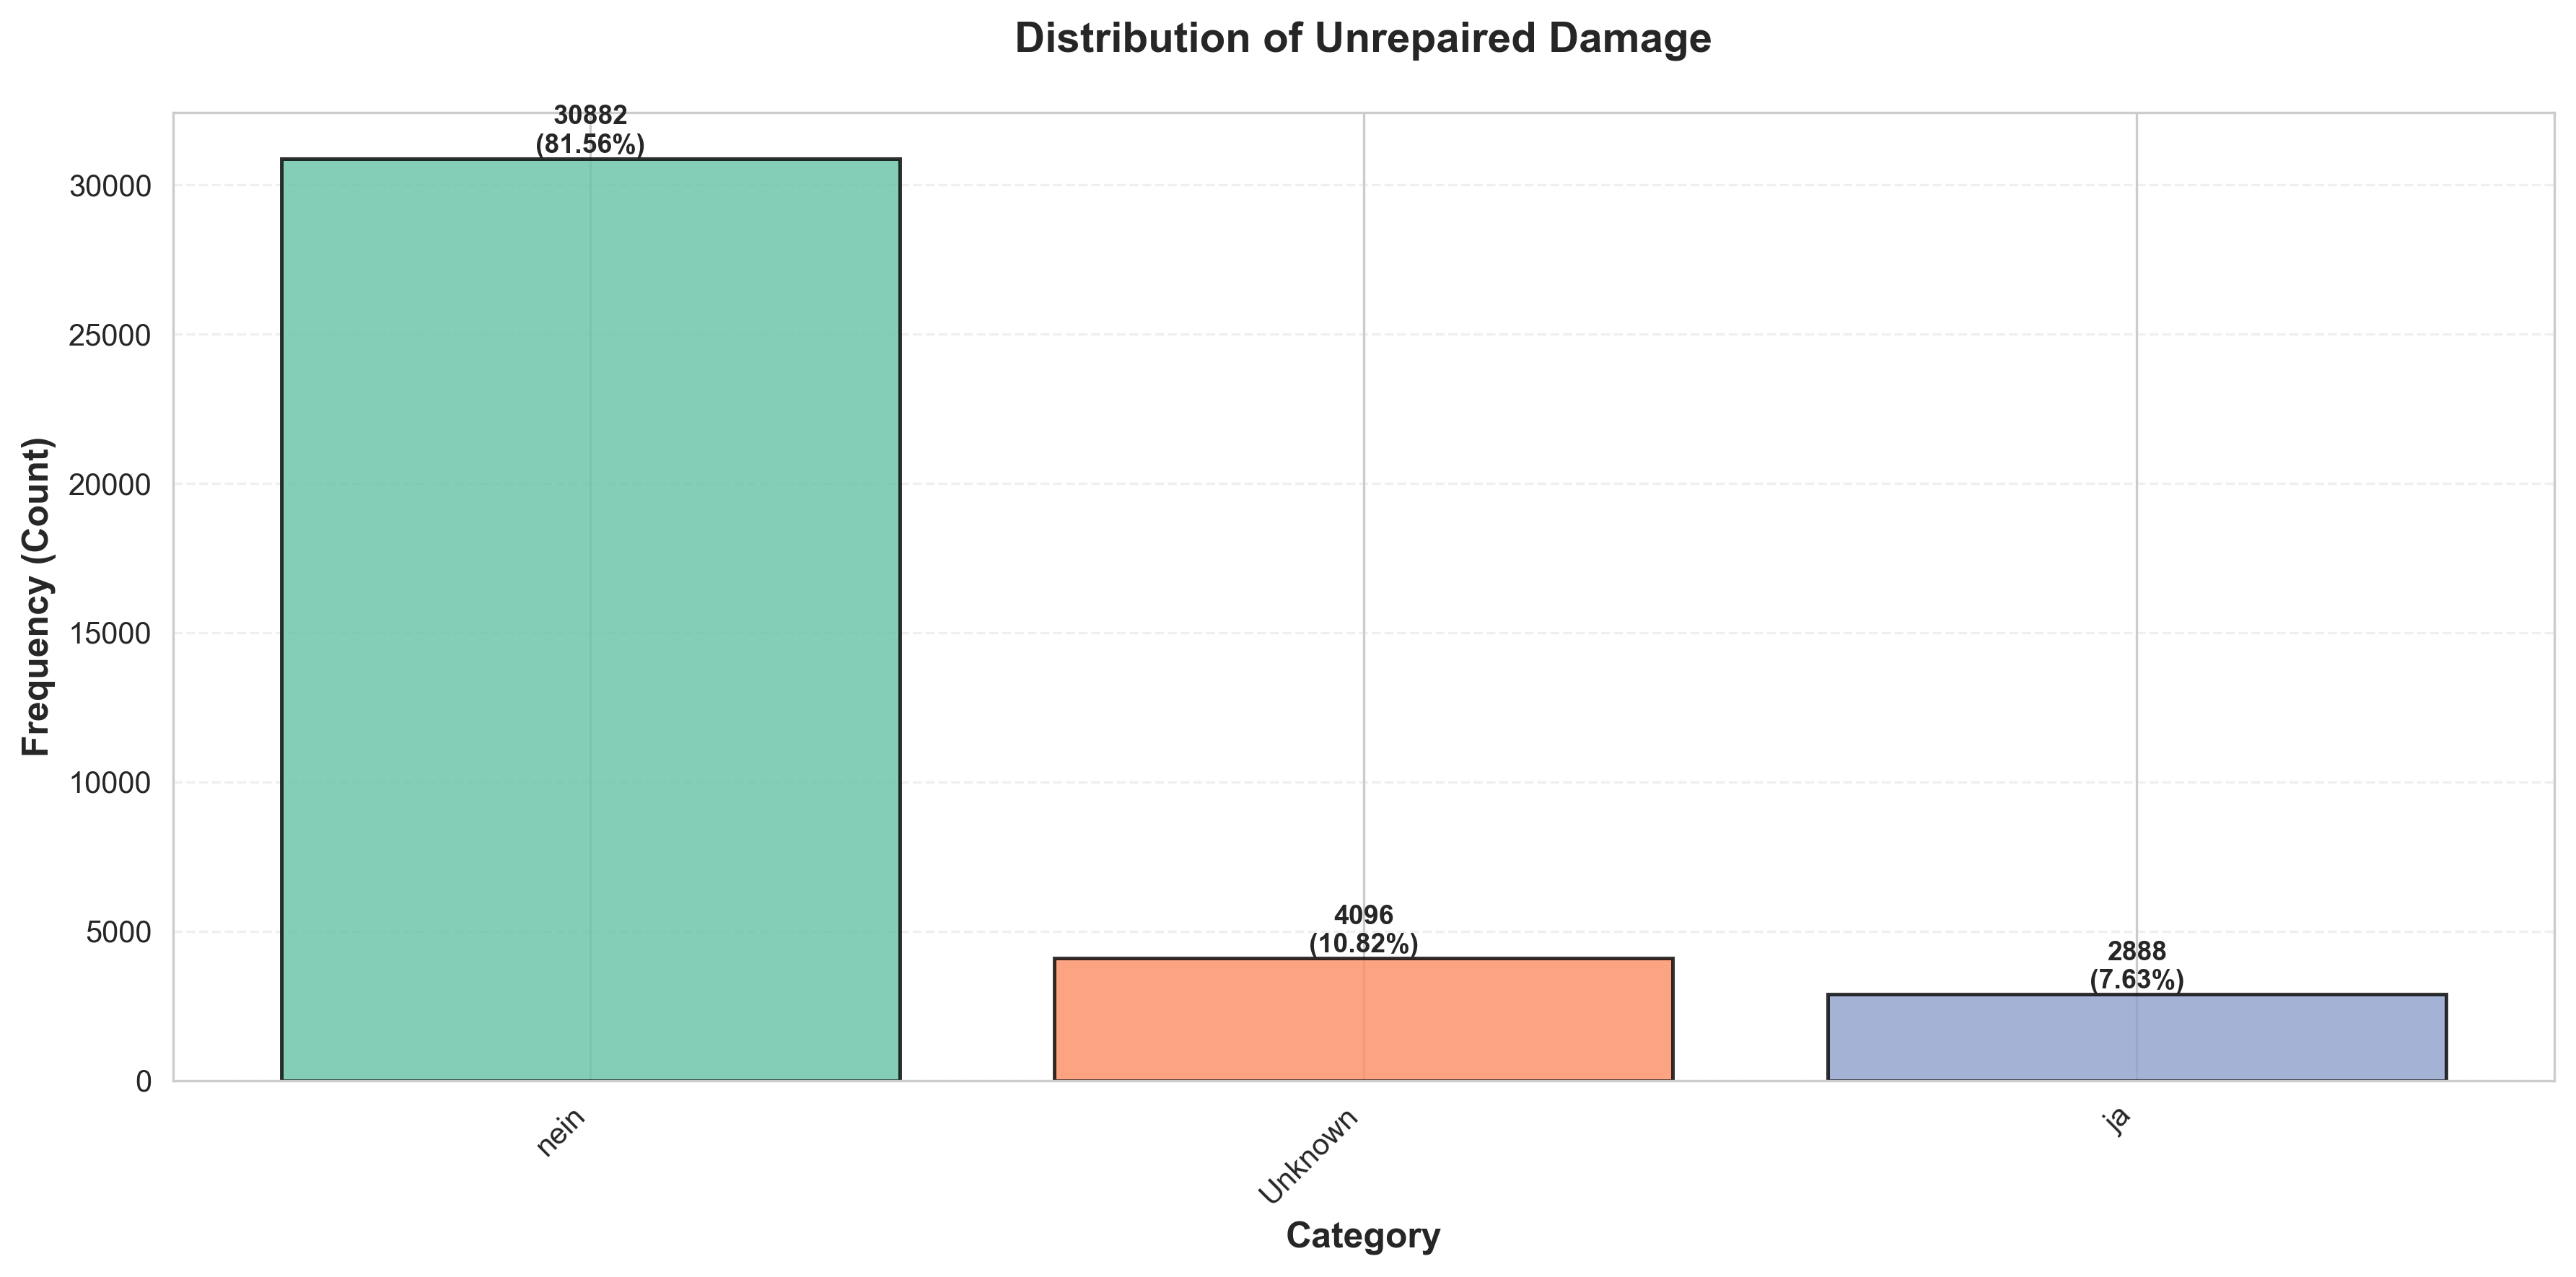


Unrepaired Damage Summary:
Total categories: 3
Most common: nein (30882 vehicles, 81.56%)


In [25]:
# Unrepaired Damage Distribution
counts_damage, pct_damage = create_distribution_plot(df, 'unrepaired_damage', 
                                                      'unrepaired_damage_distribution.png', 
                                                      color_palette)

print("\nUnrepaired Damage Summary:")
print(f"Total categories: {len(counts_damage)}")
print(f"Most common: {counts_damage.index[0]} ({counts_damage.values[0]} vehicles, {pct_damage.values[0]}%)")


### Combined Visualization: All Categorical Variables

A comprehensive 2×3 grid showing all five categorical distributions in one figure.


✓ Saved: all_categorical_distributions.png


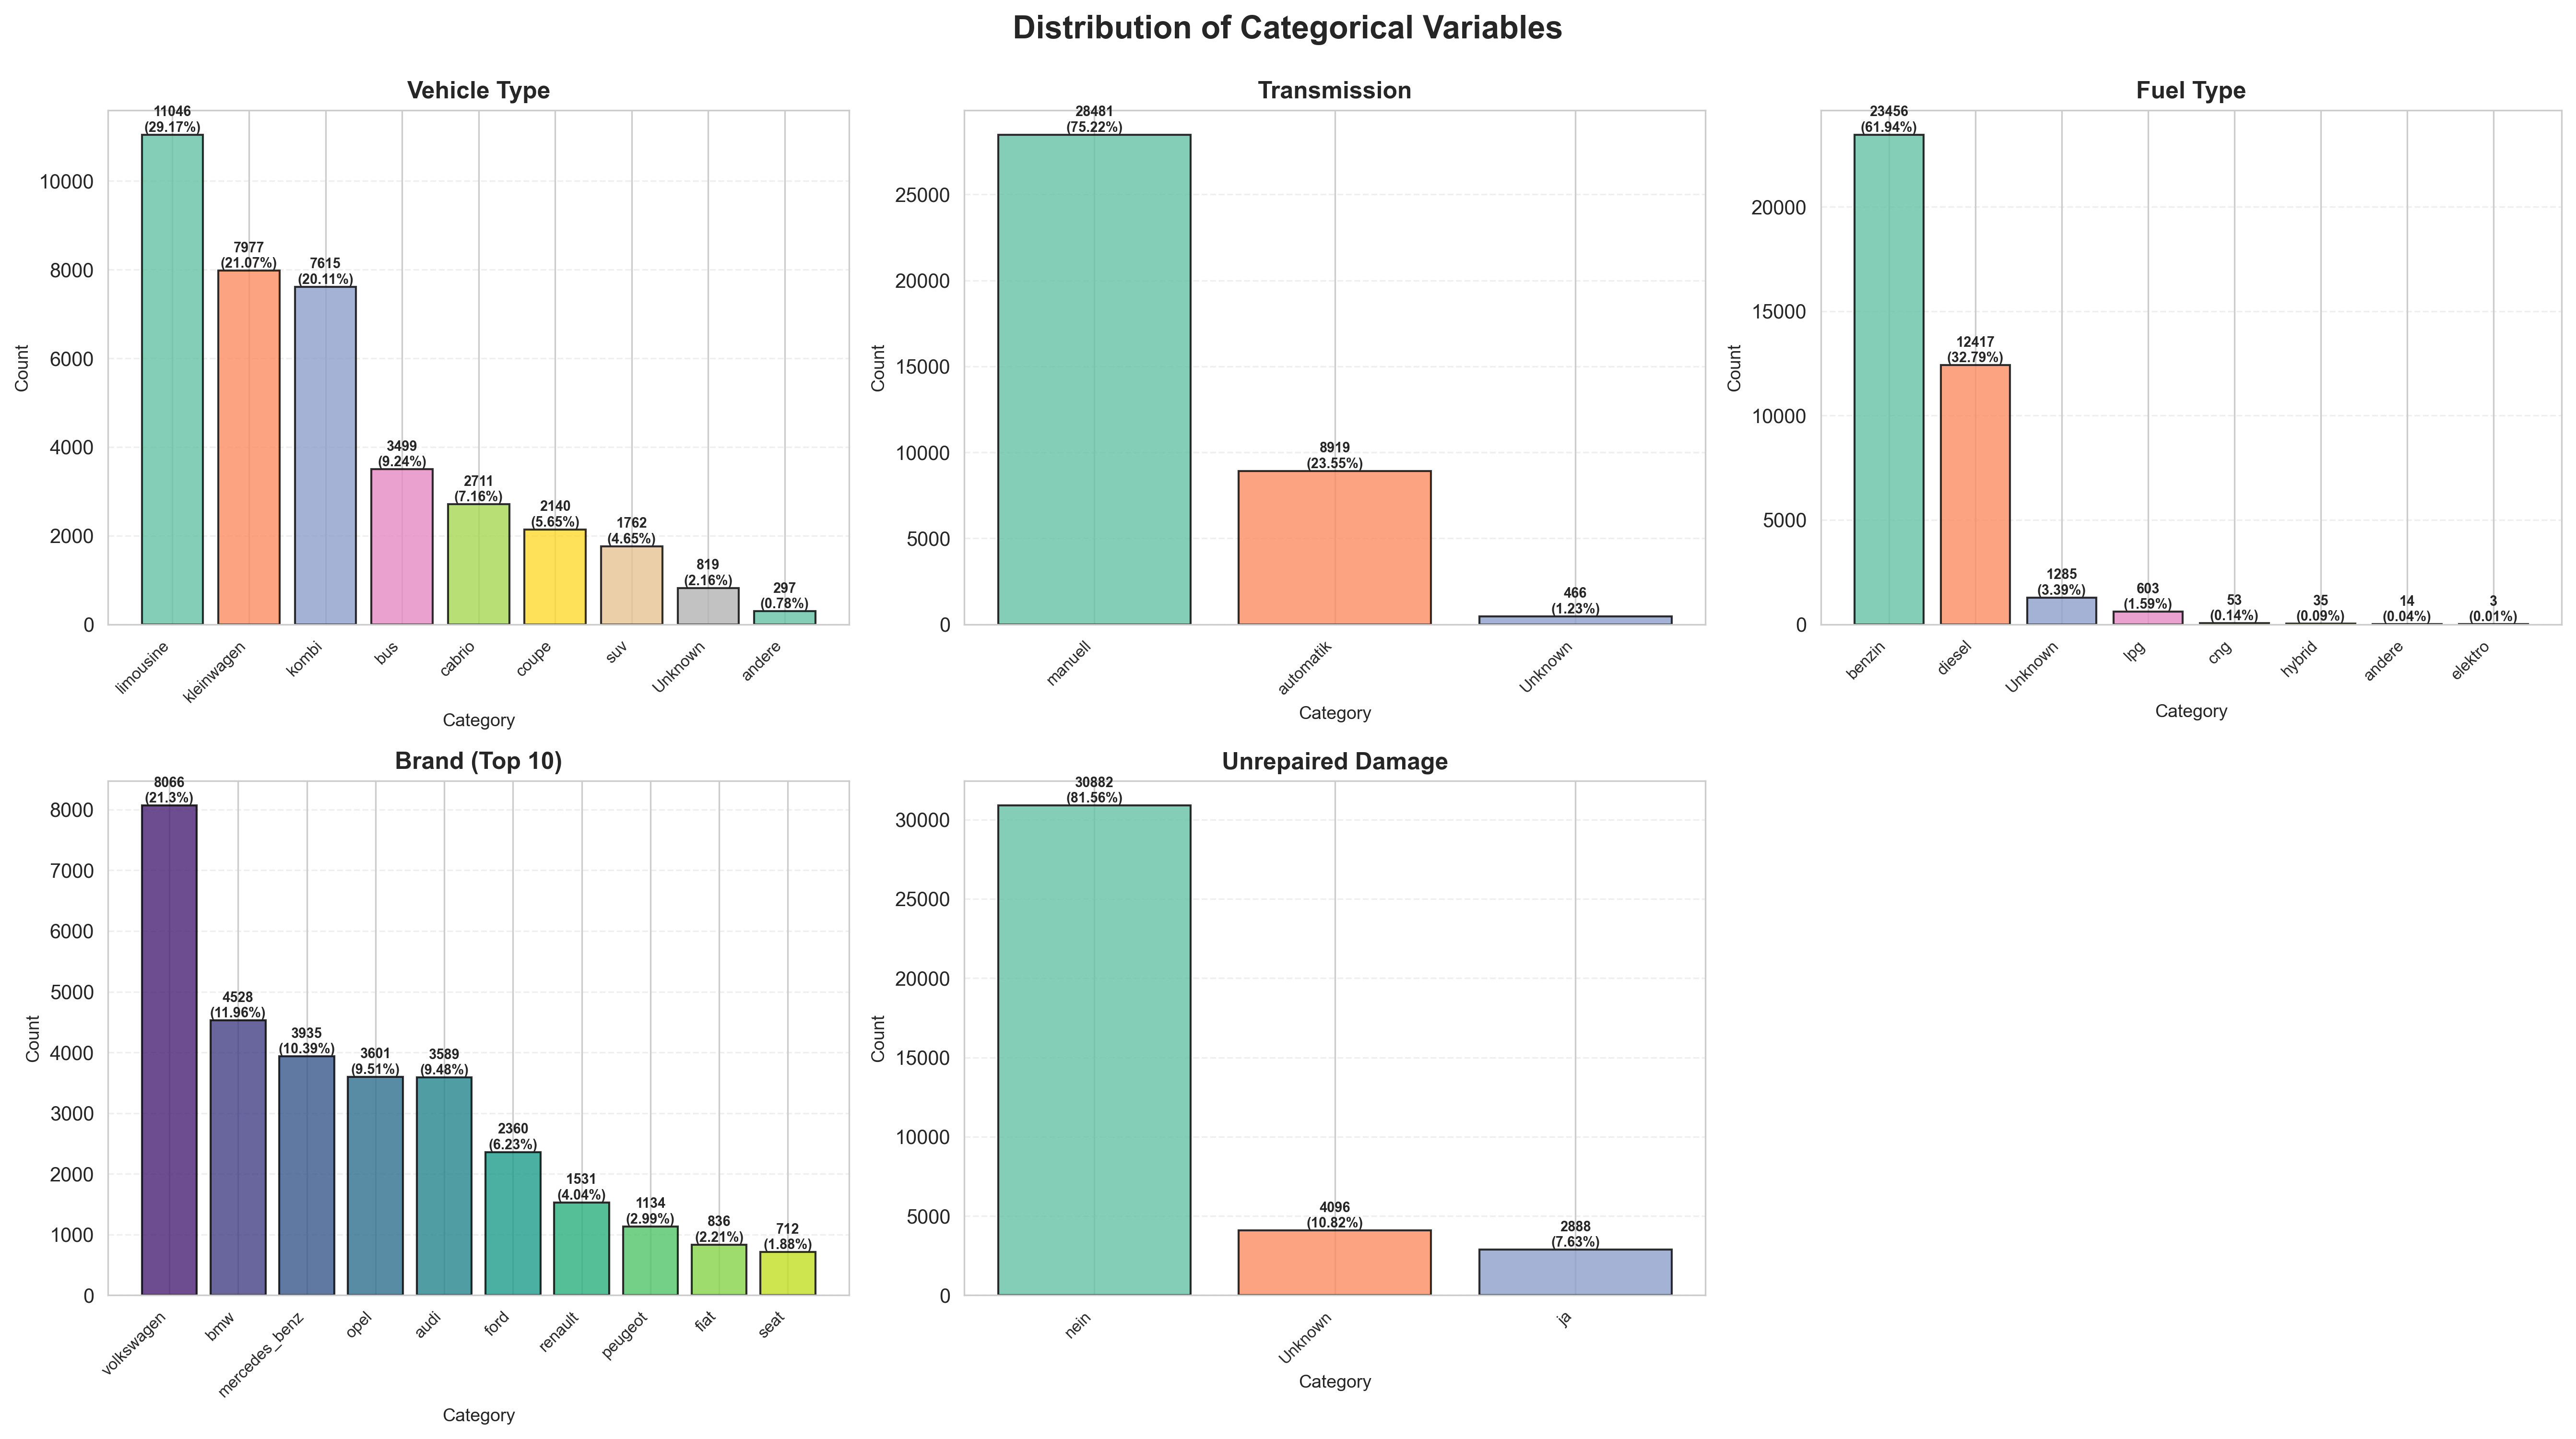

In [26]:
# Combined visualization: All 5 categorical variables in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Define variables and their titles
variables_config = [
    ('vehicle_type', 'Vehicle Type', color_palette),
    ('transmission', 'Transmission', color_palette),
    ('fuel_type', 'Fuel Type', color_palette),
    ('brand', 'Brand (Top 10)', sns.color_palette("viridis", 10)),
    ('unrepaired_damage', 'Unrepaired Damage', color_palette)
]

for idx, (var, title, colors) in enumerate(variables_config):
    ax = axes[idx]
    
    # Prepare data
    var_data = df[var].copy()
    var_data = var_data.fillna('Desconocido / Missing')
    value_counts = var_data.value_counts()
    total = len(var_data)
    percentages = (value_counts / total * 100).round(2)
    
    # For brand, show only top 10
    if var == 'brand':
        value_counts = value_counts.head(10)
        percentages = percentages.head(10)
    
    # Create bars
    bars = ax.bar(range(len(value_counts)), value_counts.values,
                   color=colors[:len(value_counts)], alpha=0.8, 
                   edgecolor='black', linewidth=1)
    
    # Customize
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Category', fontsize=9)
    ax.set_ylabel('Count', fontsize=9)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=8)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    # Add value labels
    for bar, count, pct in zip(bars, value_counts.values, percentages.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}\n({pct}%)',
                ha='center', va='bottom', fontsize=7, fontweight='bold')

# Hide the 6th subplot (empty slot)
axes[5].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(output_dir / 'all_categorical_distributions.png', bbox_inches='tight', dpi=300)
print("✓ Saved: all_categorical_distributions.png")
plt.show()


---

## Final Summary

All visualizations have been successfully created and saved in high quality (300 DPI) for publication:

**Initial Dataset Summaries:**
- `overview.png` - Dataset structure and overview
- `types.png` - Variable type distribution
- `summary.png` - Statistical summary with boxplots

**Categorical Variable Distributions:**
- `vehicle_type_distribution.png`
- `transmission_distribution.png`
- `fuel_type_distribution.png`
- `brand_distribution.png`
- `unrepaired_damage_distribution.png`
- `all_categorical_distributions.png` (combined 2×3 grid)

All images include:
✓ Frequency counts and percentages
✓ Categories ordered by frequency
✓ Clean, professional formatting
✓ Consistent color palettes
✓ Missing value handling
✓ Clear titles and labels

Ready for inclusion in your project report!
